## Final Project
## Name: [Yixiao Zhang]
## Link to your the github repo: []

In [242]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [243]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/marketing_campaign_data.csv')


# 1. Exploratory Data Analysis (EDA)

1. Descriptive Analysis
2. Correlation Analysis
3. Check imbalance in data

Converting Dt_Customer & Year_Birth into meaningful numerical features

In [244]:
# Convert Dt_Customer to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Find the most recent date in the dataset
most_recent_date = df['Dt_Customer'].max()

# Calculate the number of days since enrollment
df['Days_Since_Enrollment'] = (most_recent_date - df['Dt_Customer']).dt.days

# Drop the original Dt_Customer column
df.drop(columns=['Dt_Customer'], inplace=True)


In [245]:
# Convert Year_Birth to Age
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Drop Year_Birth if no longer needed
df = df.drop(columns=['Year_Birth'])

In [246]:
df['Education'] = df['Education'].replace('2n Cycle', 'Master')

In [247]:
# List of columns with 'Age' and 'Days_Since_Enrollment' moved to the front
columns = ['Age', 'Days_Since_Enrollment'] + [col for col in df.columns if col not in ['Age', 'Days_Since_Enrollment']]

# Reorder the dataframe columns
df = df[columns]

Importing Required Python libraries

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Summarize data

In [249]:
df.head(10)

,Age,Days_Since_Enrollment,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,67.0,663,5524,Graduation,Single,58138.0,0,0,58,NaN,...,7,0,0,0,0,0,0,3,11,1
1,NaN,113,2174,Graduation,Single,46344.0,1,1,38,NaN,...,5,0,0,0,0,0,0,3,11,0
2,NaN,312,4141,Graduation,Together,NaN,0,0,26,426.0,...,4,0,0,0,0,0,0,3,11,0
3,NaN,139,6182,Graduation,Together,26646.0,1,0,26,11.0,...,6,0,0,0,0,0,0,3,11,0
4,NaN,161,5324,PhD,Married,58293.0,1,0,94,173.0,...,5,0,0,0,0,0,0,3,11,0
5,NaN,293,7446,Master,Together,62513.0,0,1,16,520.0,...,6,0,0,0,0,0,0,3,11,0
6,53.0,593,965,Graduation,Divorced,NaN,0,1,34,NaN,...,6,0,0,0,0,0,0,3,11,0
7,39.0,417,6177,PhD,Married,33454.0,1,0,32,76.0,...,8,0,0,0,0,0,0,3,11,0
8,NaN,388,4855,PhD,Together,30351.0,1,0,19,NaN,...,9,0,0,0,0,0,0,3,11,1
9,NaN,108,5899,PhD,Together,5648.0,1,1,68,NaN,...,20,1,0,0,0,0,0,3,11,0


In [250]:
df[df['Education'] == '2n Cycle']

,Age,Days_Since_Enrollment,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [251]:
print ('Shape of the given dataset is {}.Contains {} rows and {} columns '.format(df.shape,df.shape[0],df.shape[1]))

Shape of the given dataset is (2240, 29).Contains 2240 rows and 29 columns 


Feature Names and its Datatypes

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1162 non-null   float64
 1   Days_Since_Enrollment  2240 non-null   int64  
 2   ID                     2240 non-null   int64  
 3   Education              2240 non-null   object 
 4   Marital_Status         2240 non-null   object 
 5   Income                 1150 non-null   float64
 6   Kidhome                2240 non-null   int64  
 7   Teenhome               2240 non-null   int64  
 8   Recency                2240 non-null   int64  
 9   MntWines               1162 non-null   float64
 10  MntFruits              1162 non-null   float64
 11  MntMeatProducts        1162 non-null   float64
 12  MntFishProducts        2240 non-null   int64  
 13  MntSweetProducts       2240 non-null   int64  
 14  MntGoldProds           2240 non-null   int64  
 15  NumD

Data Spliting: Select and separately store Numerical and Categorical features in different variables.

In [253]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 27 numerical features: 

['Age', 'Days_Since_Enrollment', 'ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [254]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 2 categorical features: 

['Education', 'Marital_Status']


## Descriptive Analysis
* In descriptive Analysis we analysis each variable separately to get inference about the feature.

Summary satistics of Numerical Features

In [255]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1162.0,55.135972,11.531349,29.0,47.00,54.0,64.00,84.0
Days_Since_Enrollment,2240.0,353.582143,202.122512,0.0,180.75,355.5,529.00,699.0
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Income,1150.0,51604.226087,21625.580361,2447.0,35182.50,50840.0,67429.75,160803.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,1162.0,305.436317,341.467278,0.0,23.00,175.5,502.75,1493.0
MntFruits,1162.0,26.387263,38.992609,0.0,2.00,9.0,33.00,199.0
MntMeatProducts,1162.0,169.975904,223.593075,1.0,16.00,67.5,240.75,1725.0


Above table show basic statistics like mean, quantiles, Standard deviation about each numerical features

Summary satistics of Categorical features

In [256]:
categorical_data.describe(include='object').T

,count,unique,top,freq
Education,2240,4,Graduation,1127
Marital_Status,2240,8,Married,864


Variance of each numerical features

In [257]:
numerical_data.var()

Age                      1.329720e+02
Days_Since_Enrollment    4.085351e+04
ID                       1.054082e+07
Income                   4.676657e+08
Kidhome                  2.898725e-01
Teenhome                 2.965219e-01
Recency                  8.388237e+02
MntWines                 1.165999e+05
MntFruits                1.520424e+03
MntMeatProducts          4.999386e+04
MntFishProducts          2.984325e+03
MntSweetProducts         1.704080e+03
MntGoldProds             2.721442e+03
NumDealsPurchases        3.733542e+00
NumWebPurchases          8.130151e+00
NumCatalogPurchases      8.544517e+00
NumStorePurchases        1.056873e+01
NumWebVisitsMonth        5.888606e+00
AcceptedCmp3             6.750283e-02
AcceptedCmp4             6.902615e-02
AcceptedCmp5             6.750283e-02
AcceptedCmp1             6.017993e-02
AcceptedCmp2             1.321939e-02
Complain                 9.291257e-03
Z_CostContact            0.000000e+00
Z_Revenue                0.000000e+00
Response    

Skew in numerical features

In [258]:
numerical_data.skew()

Age                       0.145230
Days_Since_Enrollment    -0.015216
ID                        0.039832
Income                    0.477847
Kidhome                   0.635288
Teenhome                  0.407115
Recency                  -0.001987
MntWines                  1.224181
MntFruits                 2.084480
MntMeatProducts           1.906532
MntFishProducts           1.919769
MntSweetProducts          2.136081
MntGoldProds              1.886106
NumDealsPurchases         2.418569
NumWebPurchases           1.582654
NumCatalogPurchases       1.880989
NumStorePurchases         0.702237
NumWebVisitsMonth         0.207926
AcceptedCmp3              3.291705
AcceptedCmp4              3.241574
AcceptedCmp5              3.291705
AcceptedCmp1              3.555444
AcceptedCmp2              8.472093
Complain                 10.188972
Z_CostContact             0.000000
Z_Revenue                 0.000000
Response                  1.971555
dtype: float64

Observation
1. Highly Positively Skewed Features (Skew > 2):
    * Spending Features:
    MntFruits (2.08), MntSweetProducts (2.14), MntMeatProducts (1.91), MntFishProducts (1.92), MntGoldProds (1.89)\
    These indicate most customers spent little, with few spending significantly.
    * Campaign Features:
    AcceptedCmp1 (3.55), AcceptedCmp2 (8.47), AcceptedCmp3 (3.29), AcceptedCmp4 (3.24), AcceptedCmp5 (3.29)\
    These reflect rare acceptance of campaigns.
    * Complaint Feature:
    Complain (10.19) suggests almost all customers did not complain.
2. Moderately Positively Skewed Features (1 < Skew ≤ 2):
    * Purchase Frequency:
    NumDealsPurchases (2.42), NumWebPurchases (1.58), NumCatalogPurchases (1.88)\
    These indicate most customers purchased occasionally, with few making frequent purchases.

3. Moderate Skew Close to Normal (Skew ≤ 1): 
    * Income (0.48), Teenhome (0.41), and Kidhome (0.63) suggest less skew, reflecting a more balanced distribution.
4. Negatively Skewed Features: Age Proxy (Year_Birth): (-0.15)
    * Indicates slightly older individuals are overrepresented in the dataset.

Histograms: To find the distributions and outlier in the each feature

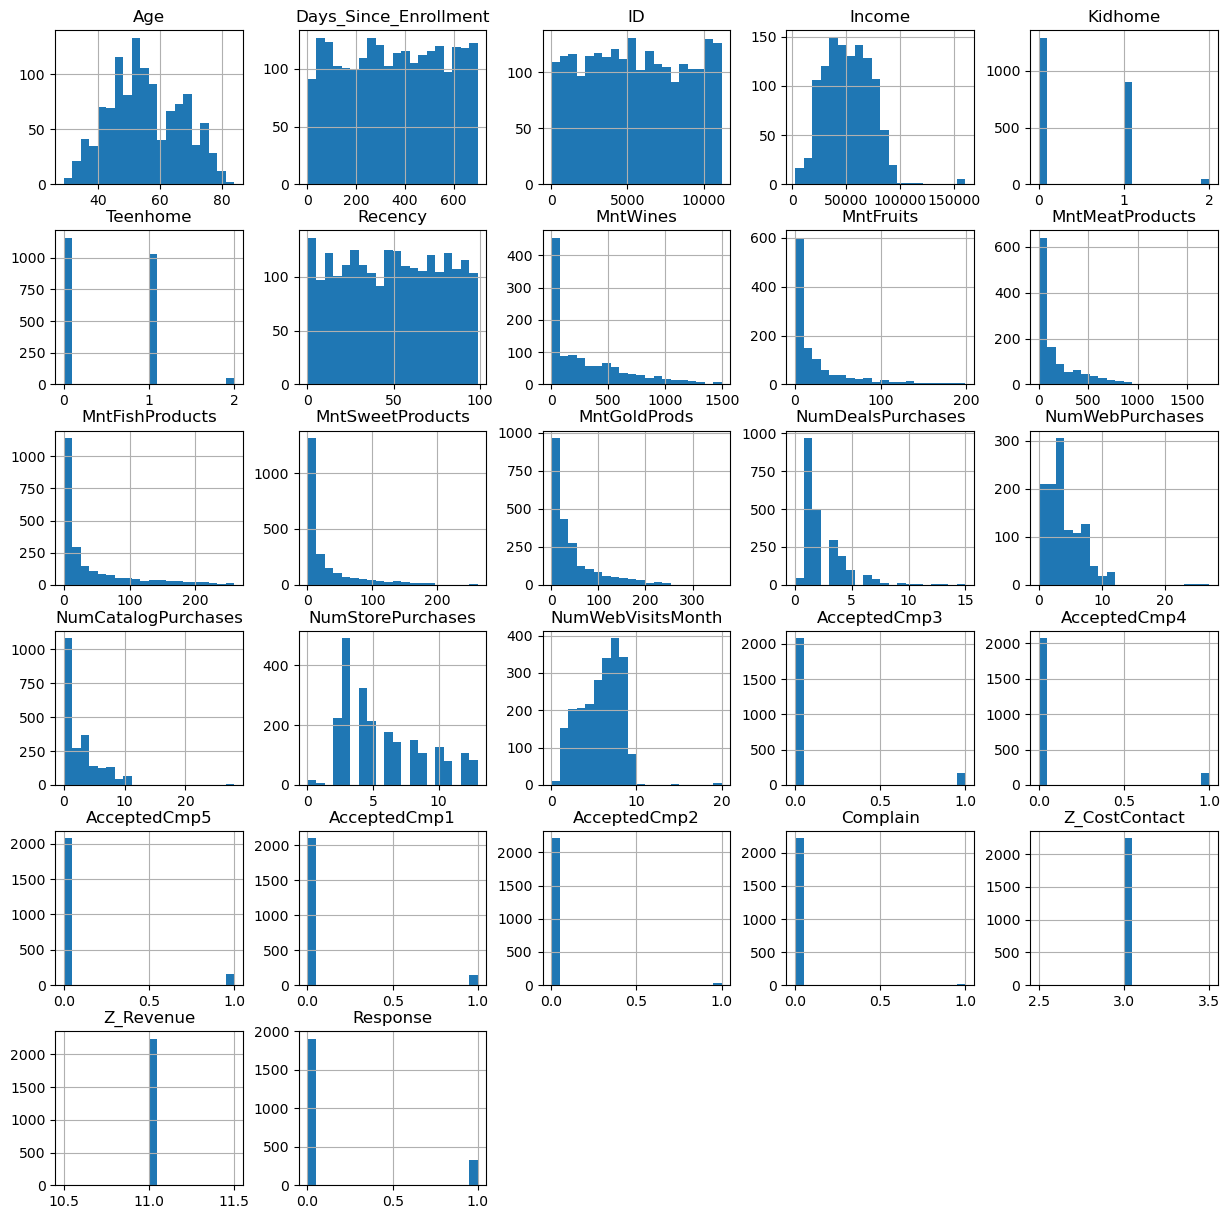

In [259]:
numerical_data.hist(figsize=(15,15),bins=20)
plt.show()

Number Unique values in each feature

In [260]:
numerical_data.nunique()

Age                        55
Days_Since_Enrollment     663
ID                       2240
Income                   1078
Kidhome                     3
Teenhome                    3
Recency                   100
MntWines                  552
MntFruits                 140
MntMeatProducts           418
MntFishProducts           182
MntSweetProducts          177
MntGoldProds              213
NumDealsPurchases          15
NumWebPurchases            15
NumCatalogPurchases        14
NumStorePurchases          14
NumWebVisitsMonth          16
AcceptedCmp3                2
AcceptedCmp4                2
AcceptedCmp5                2
AcceptedCmp1                2
AcceptedCmp2                2
Complain                    2
Z_CostContact               1
Z_Revenue                   1
Response                    2
dtype: int64

Missing Values

In [261]:
numerical_data.isnull().sum()

Age                      1078
Days_Since_Enrollment       0
ID                          0
Income                   1090
Kidhome                     0
Teenhome                    0
Recency                     0
MntWines                 1078
MntFruits                1078
MntMeatProducts          1078
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases          1078
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
dtype: int64

In [262]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the missing values and their percentages for each column
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("Missing values by column:")
print(missing_data.to_string())

# Calculate overall percentage of missing values in the entire dataset
total_missing = df.isnull().sum().sum()  # Sum of all missing values
total_values = df.size  # Total number of values in the dataset
overall_missing_percentage = (total_missing / total_values) * 100

print(f"\nOverall missing values percentage in the entire dataset: {overall_missing_percentage:.2f}%")


Missing values by column:
                       Missing Values  Percentage
Age                              1078   48.125000
Days_Since_Enrollment               0    0.000000
ID                                  0    0.000000
Education                           0    0.000000
Marital_Status                      0    0.000000
Income                           1090   48.660714
Kidhome                             0    0.000000
Teenhome                            0    0.000000
Recency                             0    0.000000
MntWines                         1078   48.125000
MntFruits                        1078   48.125000
MntMeatProducts                  1078   48.125000
MntFishProducts                     0    0.000000
MntSweetProducts                    0    0.000000
MntGoldProds                        0    0.000000
NumDealsPurchases                   0    0.000000
NumWebPurchases                  1078   48.125000
NumCatalogPurchases                 0    0.000000
NumStorePurchases       

/var/folders/z1/qgjtgd396xq6w1n2txl607c00000gn/T/ipykernel_49846/4252974515.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data['Percentage'], palette='coolwarm')


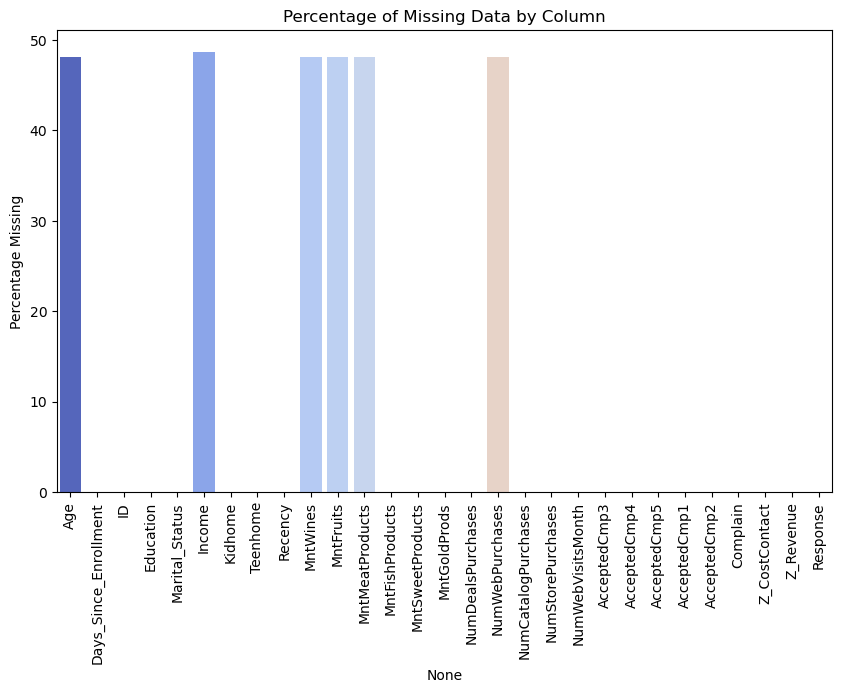

In [263]:
# Plotting the missing data percentage per column
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], palette='coolwarm')
plt.title('Percentage of Missing Data by Column')
plt.xticks(rotation=90)
plt.ylabel('Percentage Missing')
plt.show()


Categorical Features

In [264]:
# unique values counts
unique_counts=categorical_data.nunique()

for index,i in enumerate(range(2),start=1):
    print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))

1 Education has 4 unique values
2 Marital_Status has 8 unique values


/var/folders/z1/qgjtgd396xq6w1n2txl607c00000gn/T/ipykernel_49846/2712627605.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))


Barplot of unique value counts in every categorical features


Education



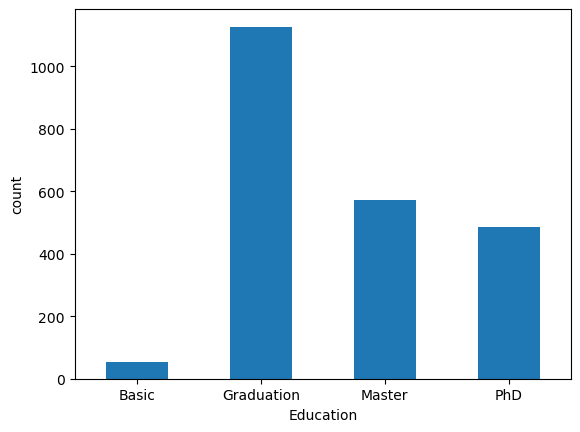


Marital_Status



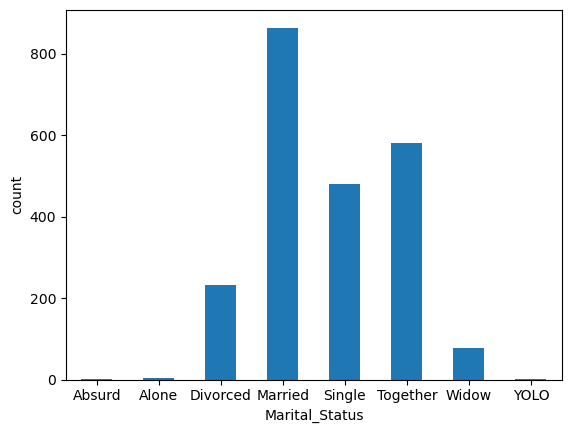

In [265]:
#through Looping generate bar plots of unqiue value counts in each variable
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

Observations

From the barplots of unique values in each categorical features shows how balanced those unique values in that specific feature.

Correlation Analysis

Correlation matrix of whole dataset


In [266]:
# Filter numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Generating correlation coefficient between each feature
correlation = numerical_columns.corr(method='pearson')  # Compute the correlation matrix
correlation = correlation.round(3)  # Round to 3 decimal places for better readability

# Display the correlation matrix
print(correlation)

                         Age  Days_Since_Enrollment     ID  Income  Kidhome  \
Age                    1.000                  0.024 -0.008   0.190   -0.245   
Days_Since_Enrollment  0.024                  1.000 -0.000  -0.046   -0.053   
ID                    -0.008                 -0.000  1.000   0.004    0.002   
Income                 0.190                 -0.046  0.004   1.000   -0.522   
Kidhome               -0.245                 -0.053  0.002  -0.522    1.000   
Teenhome               0.367                  0.017 -0.003   0.044   -0.036   
Recency                0.023                  0.025 -0.047  -0.023    0.009   
MntWines               0.197                  0.191 -0.019   0.634   -0.487   
MntFruits              0.027                  0.103 -0.014   0.486   -0.380   
MntMeatProducts        0.022                  0.076 -0.003   0.707   -0.447   
MntFishProducts        0.038                  0.081 -0.024   0.506   -0.388   
MntSweetProducts      -0.007                  0.081 

* Correlation Analysis

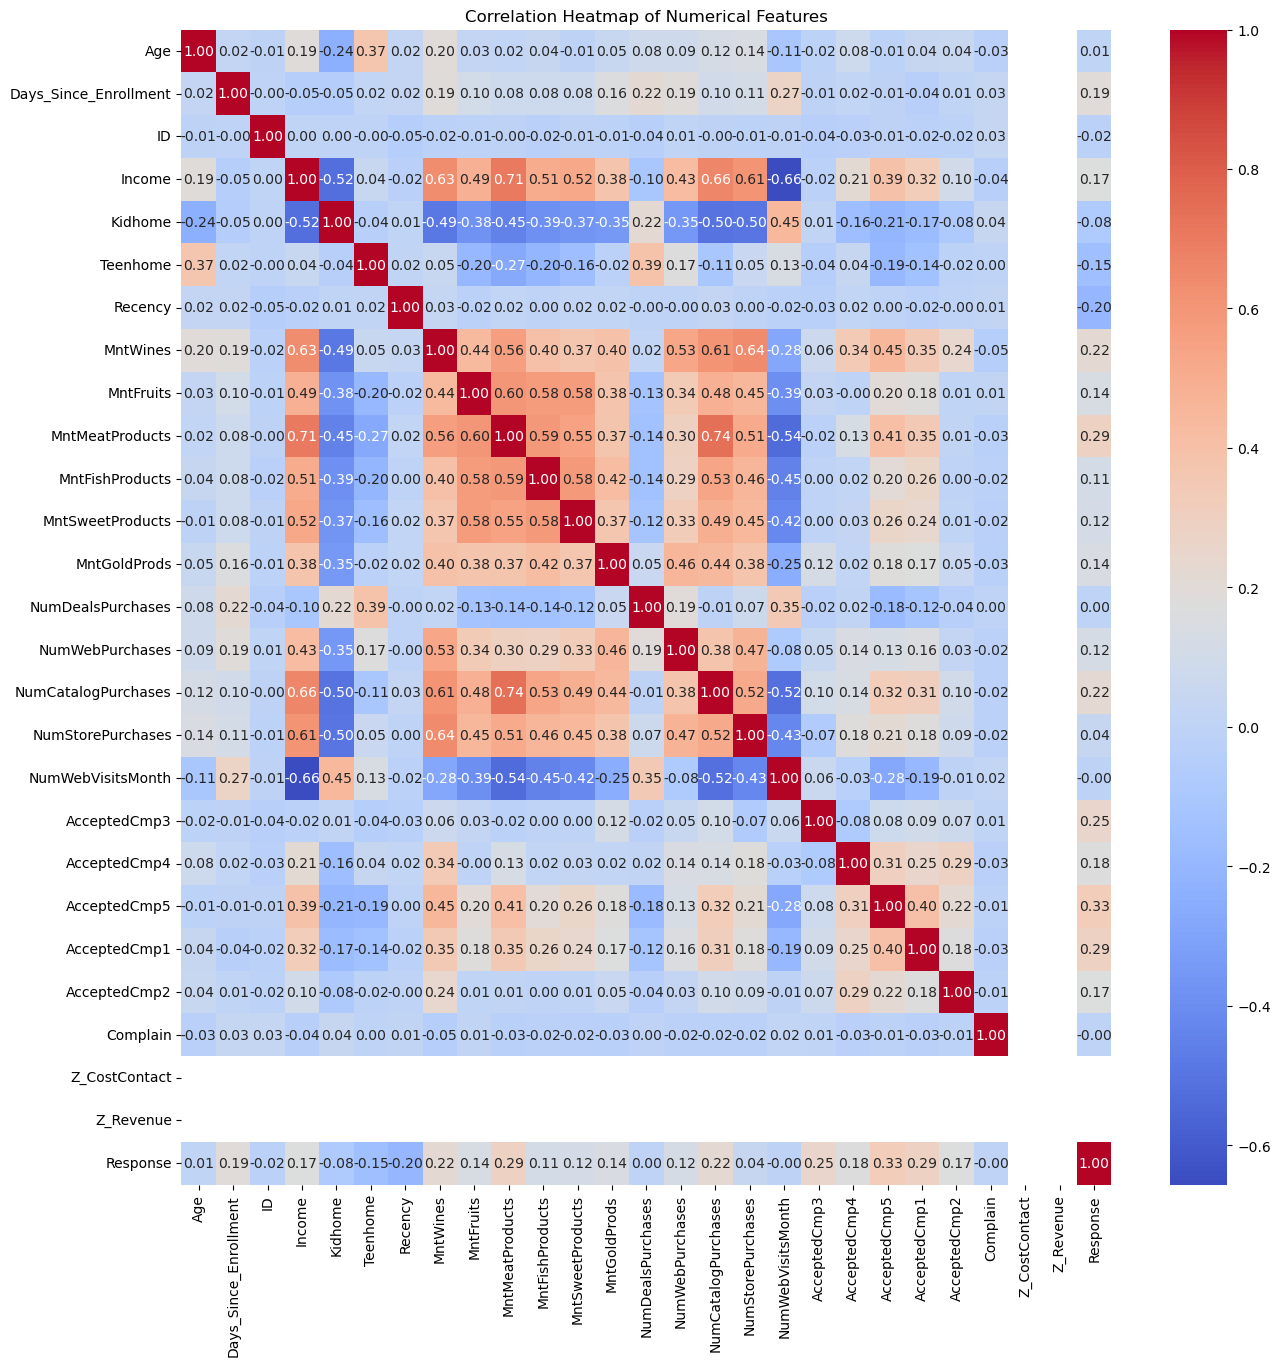

In [267]:
# Correlation heatmap

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap for numerical columns only
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Generating correlation plot between features and target variable using different method

Correlation plot between numerical features and target

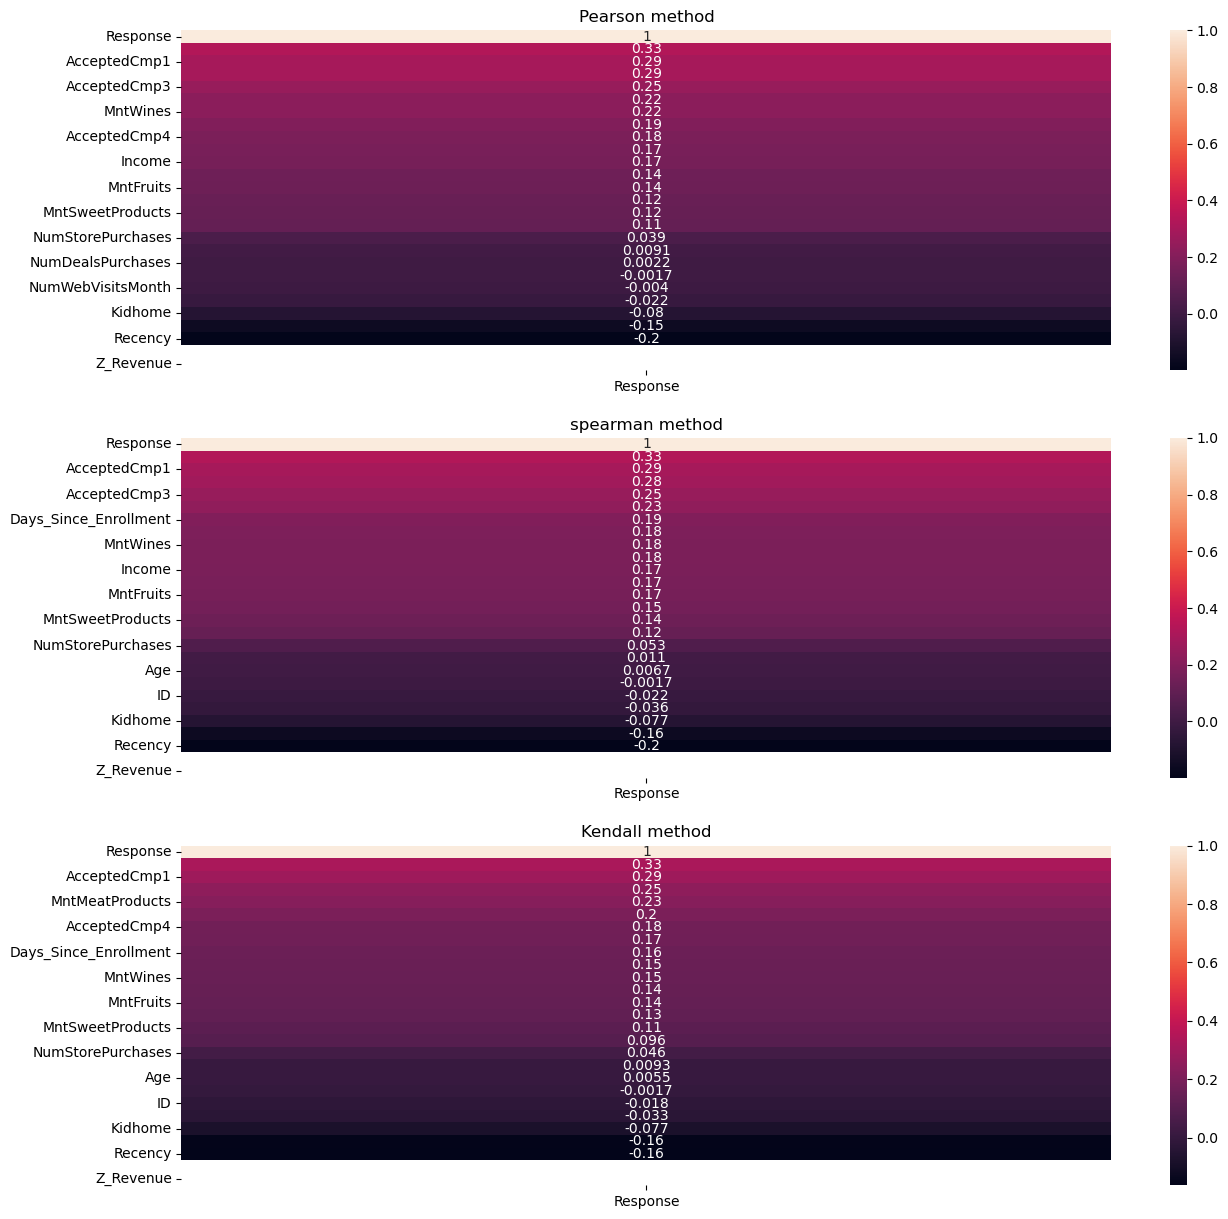

In [268]:
fig, ax = plt.subplots(3,1, figsize=(15, 15))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['Response']].sort_values(by='Response', ascending=False)
corr2 = numerical_data.corr('spearman')[['Response']].sort_values(by='Response', ascending=False)
corr3 = numerical_data.corr('kendall')[['Response']].sort_values(by='Response', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

Observation: 
* Campaign Features Dominate: The strongest correlations are from features directly linked to previous campaign acceptance (AcceptedCmpX), suggesting that customers who accepted past campaigns are more likely to respond positively.
* Spending Patterns Matter: Spending on specific products like wines and meats moderately correlates with the target, implying customers' spending habits may influence their likelihood to accept new offers.
* Weak and Irrelevant Features: Features like Teenhome, Z_CostContact, and Year_Birth exhibit weak or no correlation with Response, suggesting limited utility in prediction models.

Check imbalance in the data: We have classification problem so we need to check the balance of the given data.


In [269]:
# Check imbalance in data
class_counts = df['Response'].value_counts()  # Count occurrences of each class
total_count = len(df)  # Total number of samples

# Create a DataFrame to store counts and percentages
imbalance_df = pd.DataFrame({
    'Response': class_counts.index,
    'Count': class_counts.values,
    'Percentage': (class_counts.values / total_count) * 100
})

print(imbalance_df)

   Response  Count  Percentage
0         0   1906   85.089286
1         1    334   14.910714


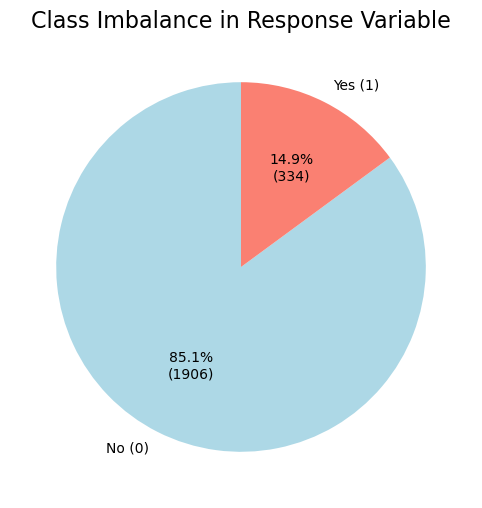

In [270]:
import matplotlib.pyplot as plt

# Count the response variable
response_counts = df['Response'].value_counts()
sum_counts = sum(response_counts)

# Define a function to format the pie chart labels
def autopct_format(pct):
    absolute = int(round(pct * sum_counts / 100))
    return f"{pct:.1f}%\n({absolute})"

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(response_counts, 
        labels=['No (0)', 'Yes (1)'], 
        autopct=autopct_format, 
        startangle=90, 
        colors=['lightblue', 'salmon'])

plt.title('Class Imbalance in Response Variable', fontsize=16)
plt.show()

Barplot of response vs Percentage

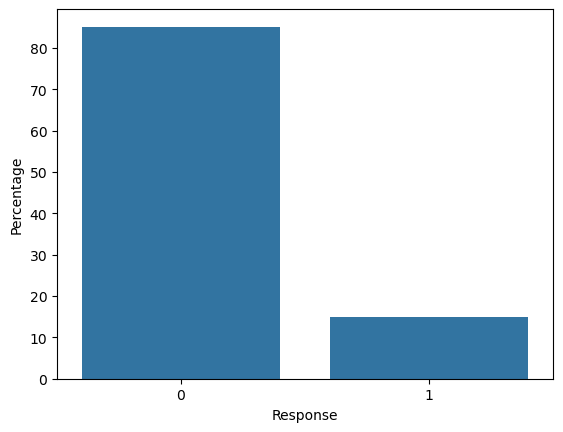

In [271]:
sns.barplot(data=imbalance_df,x=imbalance_df['Response'],y=imbalance_df['Percentage'])
plt.show()

Observation
* Based on the above grouping, It shows that around 85% of instances consists RESPONSE value '0' and 14.9% of instances consists RESPONSE values '1'
* There is imbalance between two classes (approx 70% difference).So consider adapting performance metrics like "recall", "precision" and "f1 score" instead of "accurary" to assess the ML model. Also check if the imbalance data affecting the performance of the machine learning model


Data visualization: Some other visualizations of features to get more insights

 Feature Distribution by Target Variable

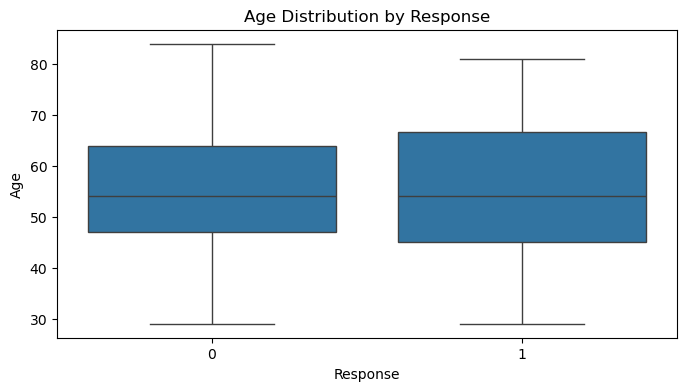

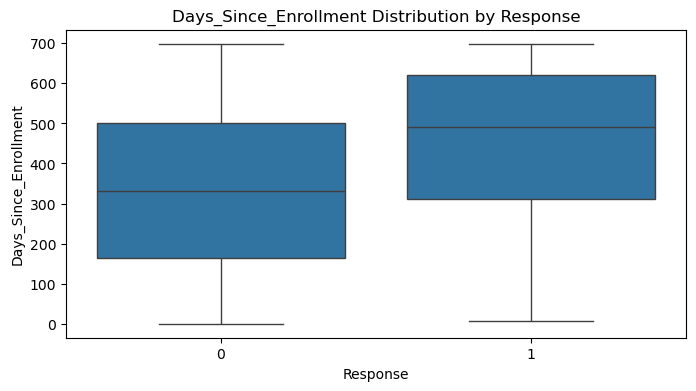

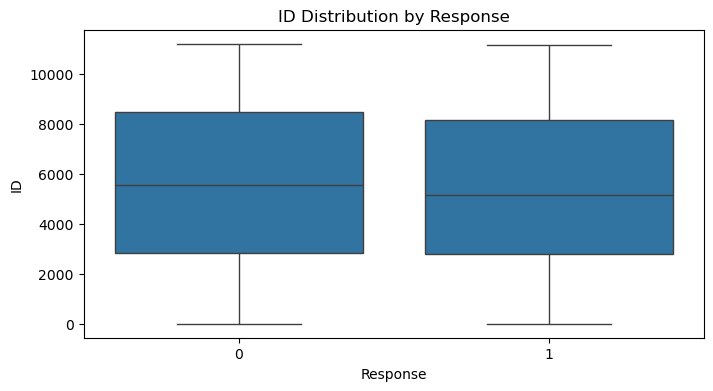

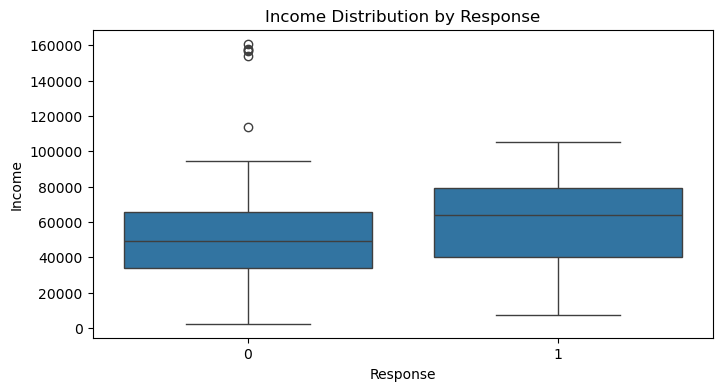

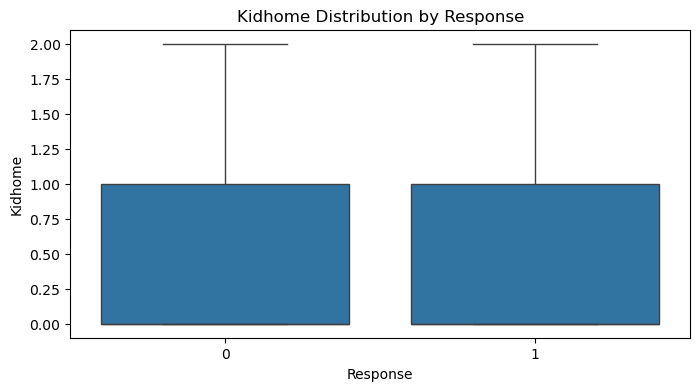

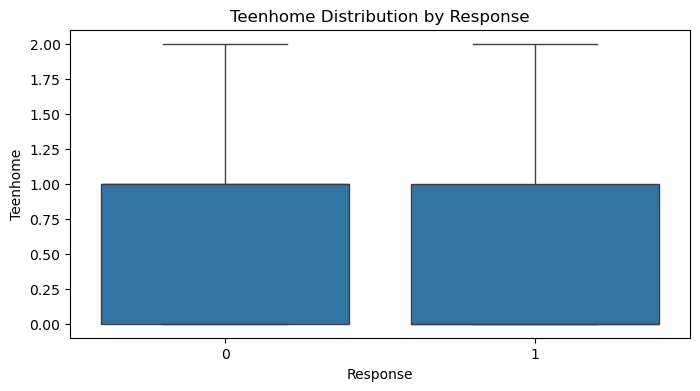

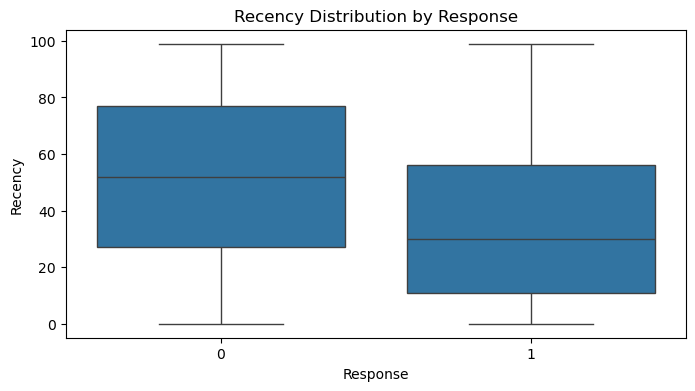

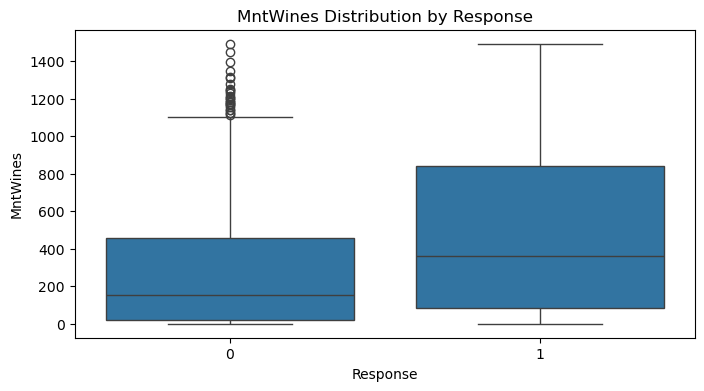

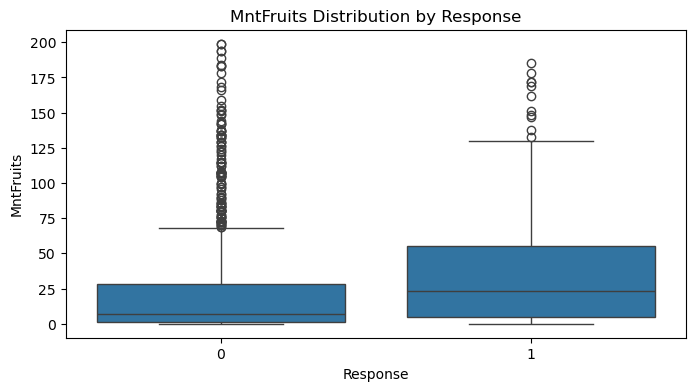

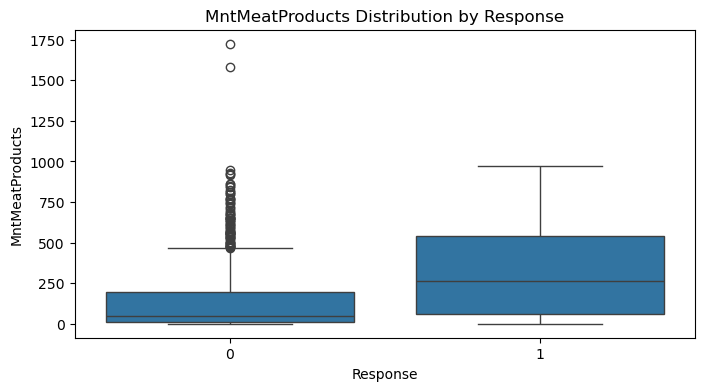

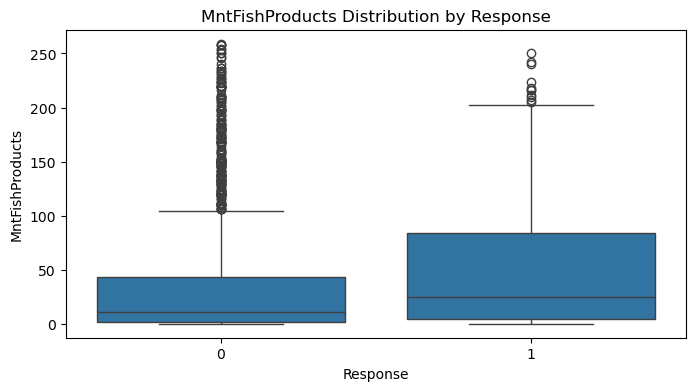

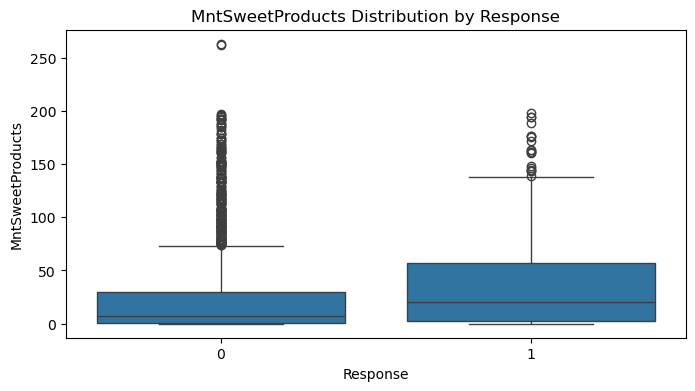

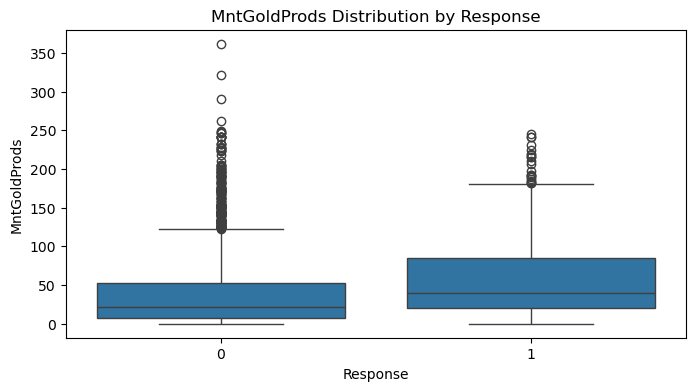

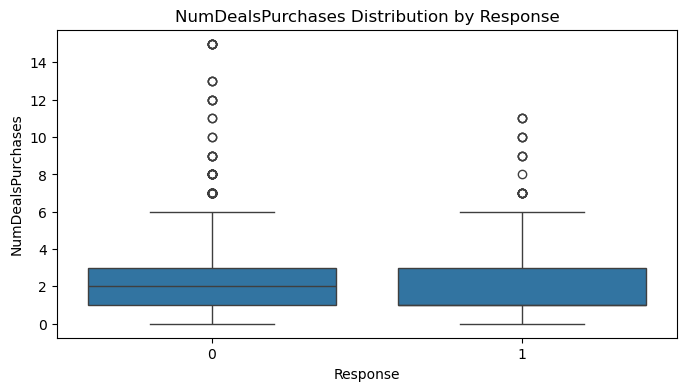

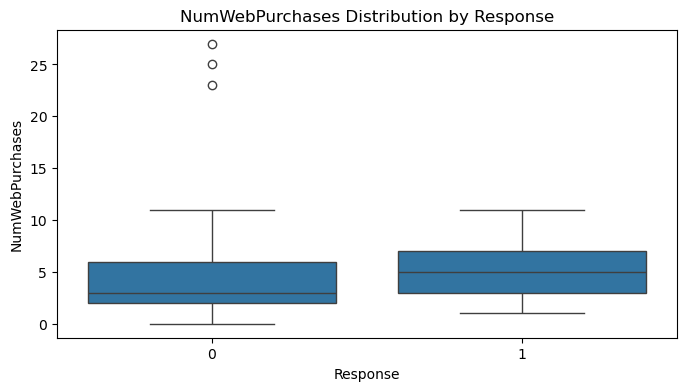

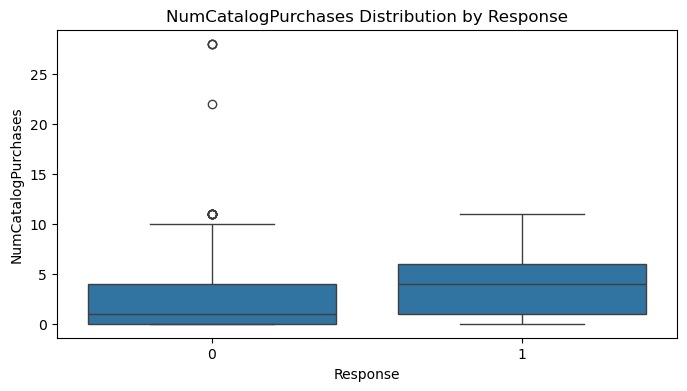

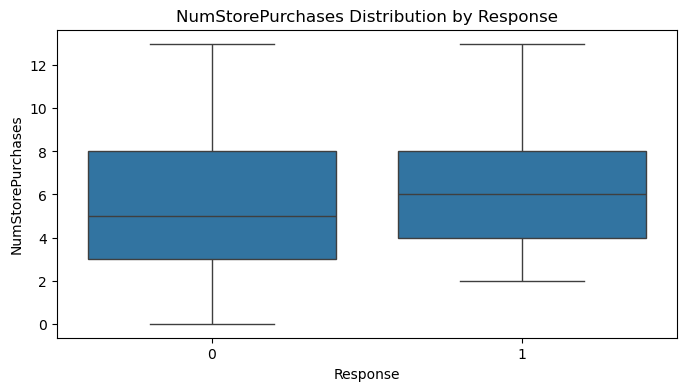

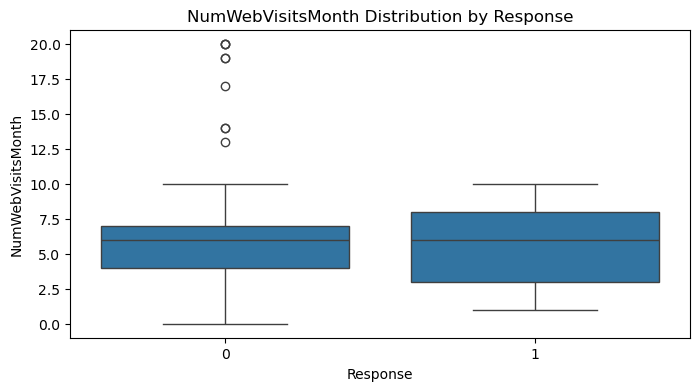

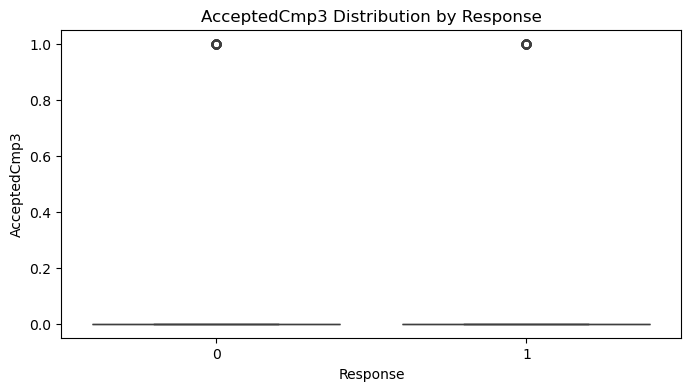

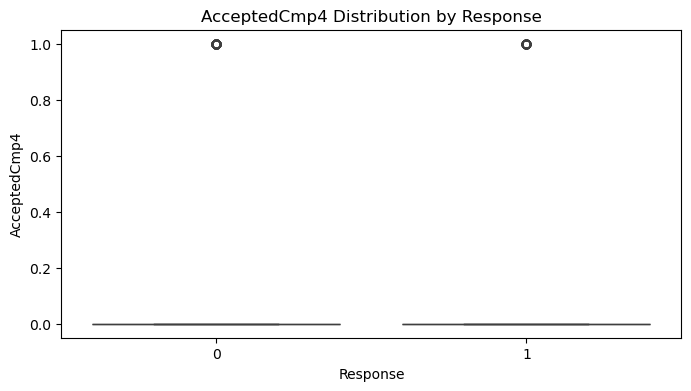

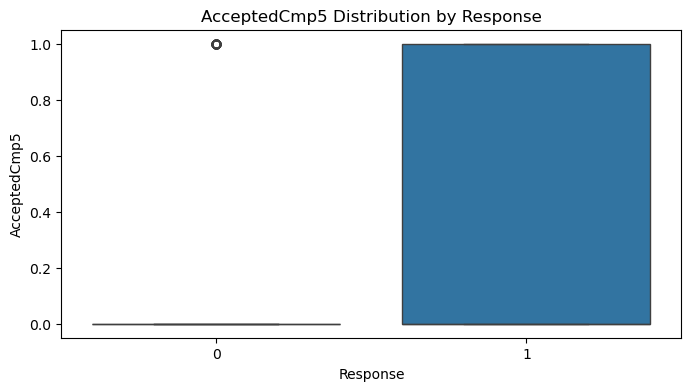

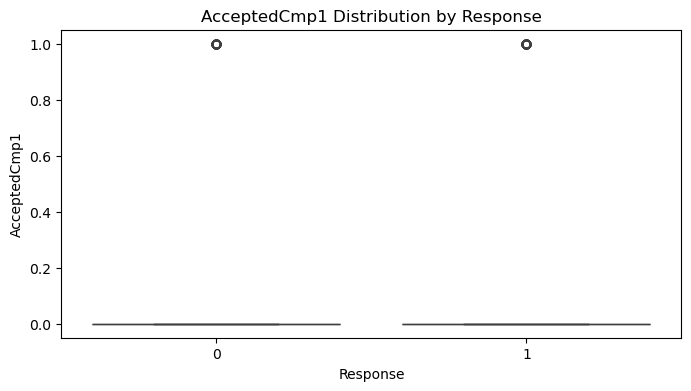

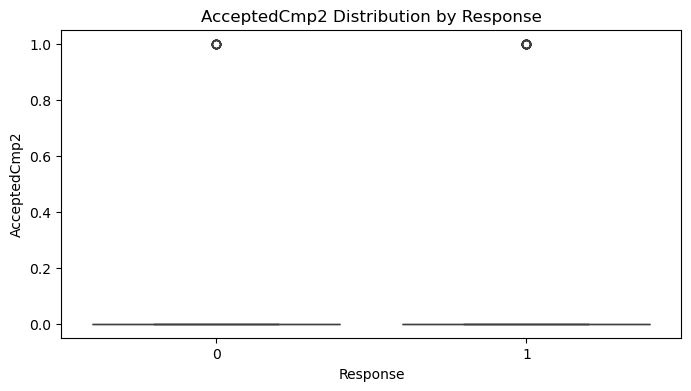

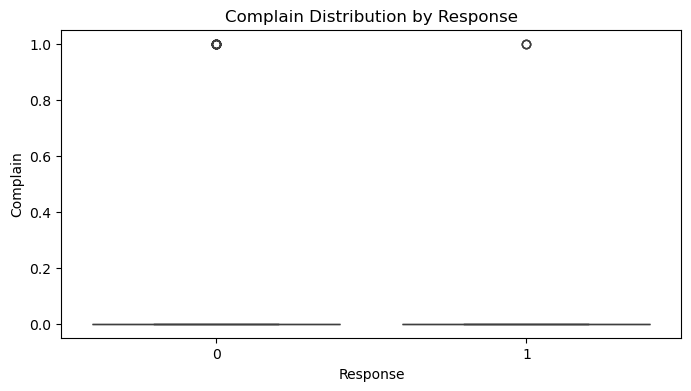

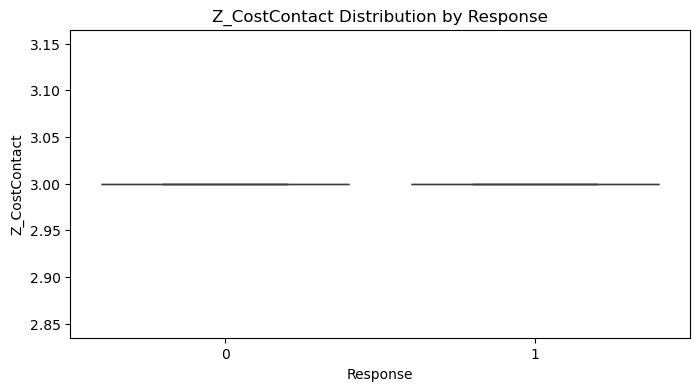

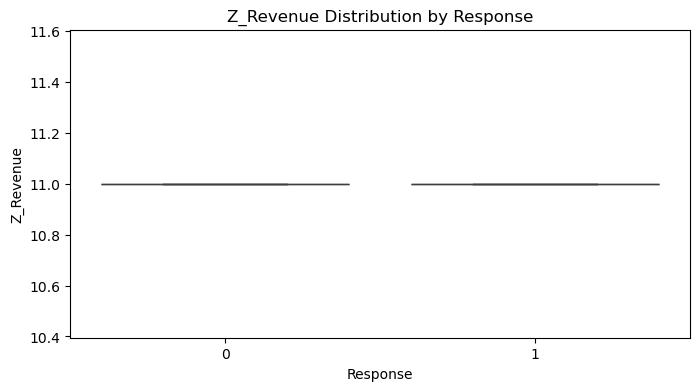

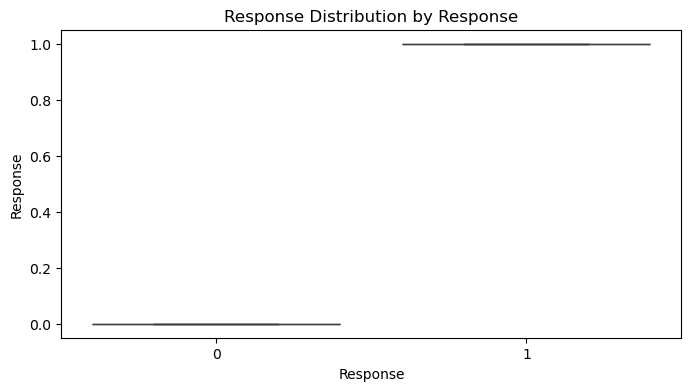

In [272]:
for col in numerical_data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['Response'], y=numerical_data[col])
    plt.title(f"{col} Distribution by Response")
    plt.xlabel("Response")
    plt.ylabel(col)
    plt.show()


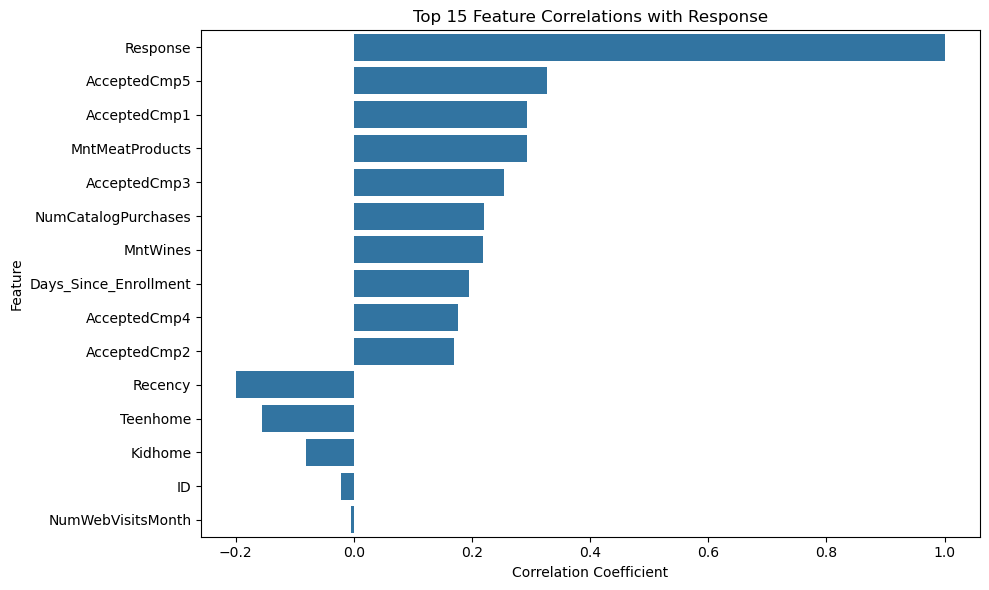

In [273]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix with numerical columns
response_correlation = numeric_df.corr()['Response']

# Select top positive and negative correlations
top_positive_corr = response_correlation[response_correlation > 0].sort_values(ascending=False).head(10)
top_negative_corr = response_correlation[response_correlation < 0].sort_values().head(5)

# Combine top positive and negative correlations
top_corr = pd.concat([top_positive_corr, top_negative_corr])

# Plot the top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 15 Feature Correlations with Response")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


* Bar Plots to Compare Categorical Variables

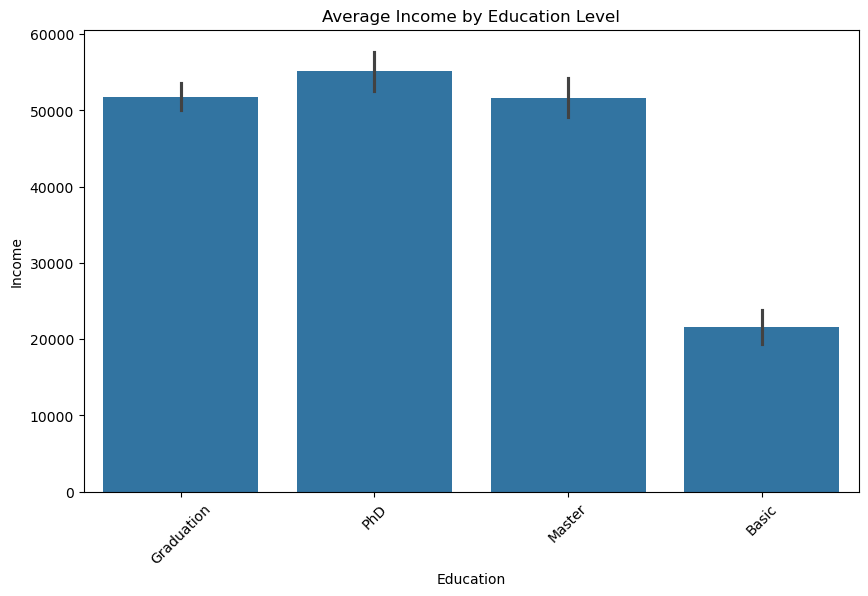

In [274]:
# Bar plot for average income per education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=df)
plt.title('Average Income by Education Level')
plt.ylabel('Income')
plt.xlabel('Education')
plt.xticks(rotation=45)
plt.show()


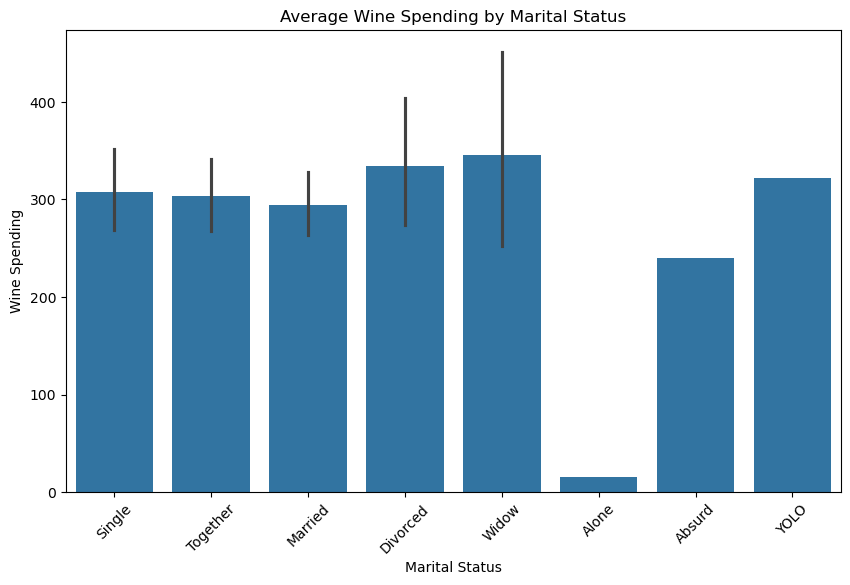

In [275]:
# Bar plot for average wine spending by marital status
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='MntWines', data=df)
plt.title('Average Wine Spending by Marital Status')
plt.ylabel('Wine Spending')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.show()

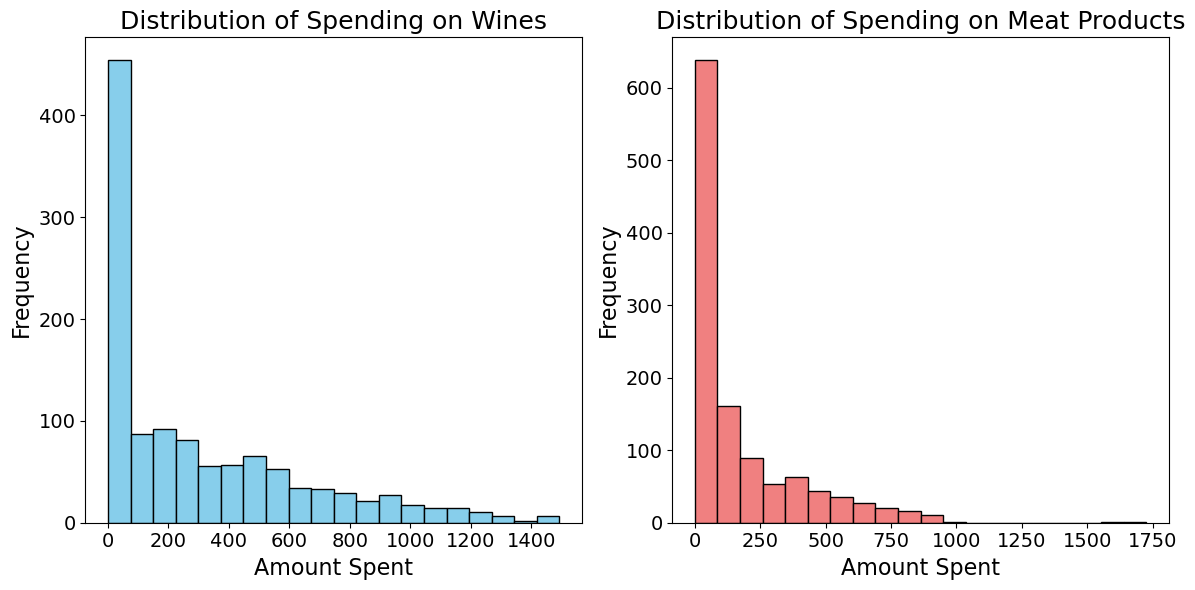

In [276]:
# Plot spending distribution for Wines and Meat Products with larger fonts
plt.figure(figsize=(12, 6))

# Distribution of Spending on Wines
plt.subplot(1, 2, 1)
plt.hist(df['MntWines'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Spending on Wines', fontsize=18)
plt.xlabel('Amount Spent', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Distribution of Spending on Meat Products
plt.subplot(1, 2, 2)
plt.hist(df['MntMeatProducts'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Spending on Meat Products', fontsize=18)
plt.xlabel('Amount Spent', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

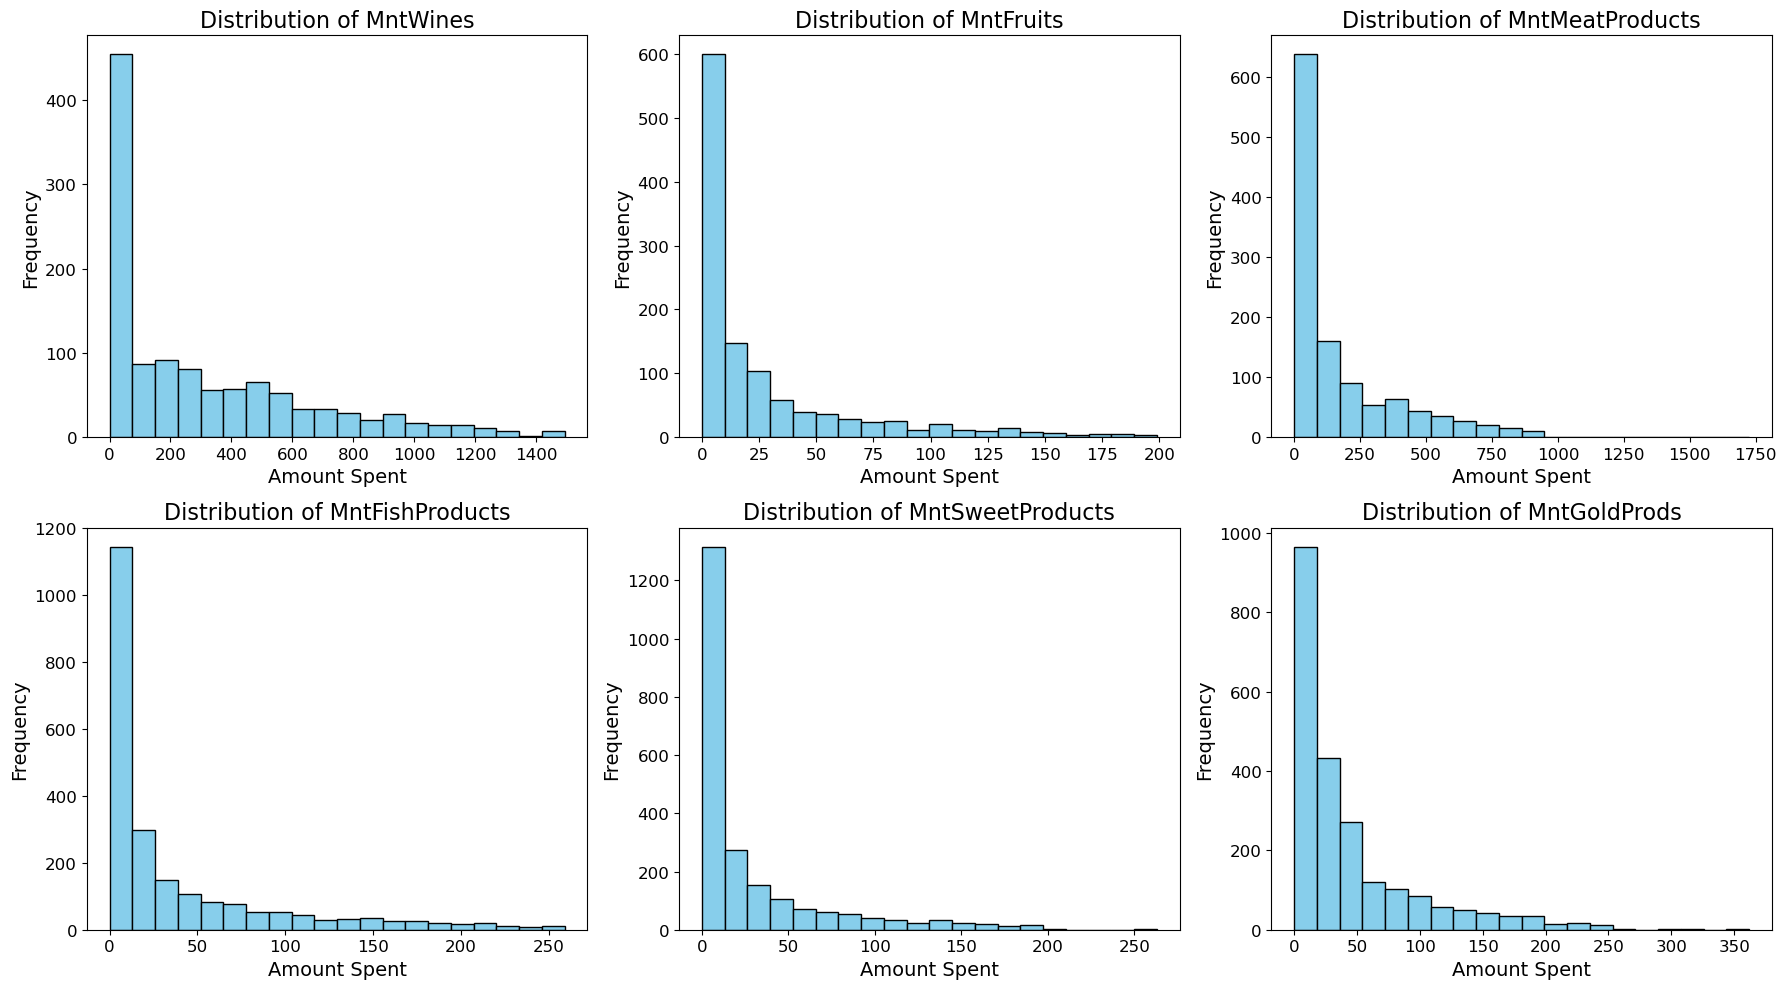

In [277]:
import matplotlib.pyplot as plt

# Assume the data is in a DataFrame called df
# First, filter out the spending-related columns (those starting with 'Mnt')
spending_cols = [col for col in df.columns if col.startswith('Mnt')]

# Determine the layout of subplots
num_cols = len(spending_cols)
cols_per_row = 3
rows = (num_cols // cols_per_row) + (1 if num_cols % cols_per_row != 0 else 0)

# Create the figure and axes
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(18, 5 * rows))

# Flatten axes to easily iterate even if there's only one row
axes = axes.flatten() if num_cols > 1 else [axes]

# Iterate over each spending column and plot the histogram
for i, col in enumerate(spending_cols):
    ax = axes[i]
    ax.hist(df[col], bins=20, edgecolor='black', color='skyblue')
    ax.set_title(f"Distribution of {col}", fontsize=16)
    ax.set_xlabel('Amount Spent', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(labelsize=12)

# If there are unused subplots (in case the number of columns isn't a multiple of 3), remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2. Split the data into different sets

### Split the Dataset

In [278]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split the dataset into 80% training, 10% validation, and 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Output size of the splits
print(f"Training Data Points: {X_train.shape[0]}")
print(f"Validation Data Points: {X_val.shape[0]}")
print(f"Testing Data Points: {X_test.shape[0]}")

Training Data Points: 1792
Validation Data Points: 224
Testing Data Points: 224


# 3. Preprocess the data

### Preprocessing (Scaling and Encoding)

In [279]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import datetime as dt

## List of numerical features
numerical_features = ['Age', 'Days_Since_Enrollment', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                      'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

categorical_features = ['Marital_Status']


edu_categories = [['Basic', 'Graduation', 'Master', 'PhD']]  # Matches unique values in the data

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('edu', OrdinalEncoder(categories=edu_categories), ['Education']),  # Ordinal encode Education
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode other categorical features
    ]
)

In [280]:
clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
# fit_transform the training set
X_prep = clf.fit_transform(X_train)
# collect feature names
feature_names = clf.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)
# transform the CV
df_CV = clf.transform(X_val)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)
# transform the test
df_test = clf.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

(1792, 31)
(224, 31)
(224, 31)


In [240]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (1792, 31)
fraction of missing values in features:
num__Age                0.476004
num__Income             0.487165
num__MntWines           0.483817
num__MntFruits          0.483259
num__MntMeatProducts    0.492188
num__NumWebPurchases    0.477679
dtype: float64
fraction of points with missing values: 0.98046875


* Summary of Features and Data Points

In [43]:
# Checking the number of features and data points before and after preprocessing
initial_features = df.shape[1]
initial_data_points = df.shape[0]

processed_features = X_train.shape[1]
training_data_points = X_train.shape[0]
validation_data_points = X_val.shape[0]
testing_data_points = X_test.shape[0]

# Summary of the preprocessing and splitting
preprocessing_summary = {
    "Initial Features": initial_features,
    "Initial Data Points": initial_data_points,
    "Processed Features": processed_features,
    "Training Data Points": training_data_points,
    "Validation Data Points": validation_data_points,
    "Testing Data Points": testing_data_points
}

# Display the preprocessing summary
print(pd.DataFrame.from_dict(preprocessing_summary, orient='index', columns=['Value']))


                        Value
Initial Features           29
Initial Data Points      2240
Processed Features         28
Training Data Points     1792
Validation Data Points    224
Testing Data Points       224


# 4. Choose an evaluation metric

**Precision:**
Directly measures how many of the predicted responders (positives) are actually interested in your offer.
This metric ensures you're avoiding false positives (uninterested customers), optimizing resource allocation.

**Precision-Recall Curve (PR Curve):**
Provides a visual representation of the trade-off between Precision and Recall across different thresholds.
Helps you identify the optimal threshold where Precision is maximized while maintaining an acceptable Recall.

# 5. Choose one or more ML techniques

## Debug

In [290]:
# Debug
from sklearn.preprocessing import OrdinalEncoder

# 处理 'Education' 字段
education_encoder = OrdinalEncoder(categories=[['Basic', 'Graduation', 'Master', 'PhD']])
X_train['Education'] = education_encoder.fit_transform(X_train[['Education']])
X_val['Education'] = education_encoder.transform(X_val[['Education']])
X_test['Education'] = education_encoder.transform(X_test[['Education']])

# 处理 'Marital_Status' 字段 (假设你要用 OneHotEncoder)
marital_encoder = OrdinalEncoder()
X_train['Marital_Status'] = marital_encoder.fit_transform(X_train[['Marital_Status']])
X_val['Marital_Status'] = marital_encoder.transform(X_val[['Marital_Status']])
X_test['Marital_Status'] = marital_encoder.transform(X_test[['Marital_Status']])

In [291]:
# Debug
print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

Age                      float64
Days_Since_Enrollment      int64
ID                         int64
Education                float64
Marital_Status           float64
Income                   float64
Kidhome                    int64
Teenhome                   int64
Recency                    int64
MntWines                 float64
MntFruits                float64
MntMeatProducts          float64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases          float64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
AcceptedCmp3               int64
AcceptedCmp4               int64
AcceptedCmp5               int64
AcceptedCmp1               int64
AcceptedCmp2               int64
Complain                   int64
Z_CostContact              int64
Z_Revenue                  int64
dtype: object
Age                      float64
Days_Since_Enrollment      in

In [292]:
# Baseline (F1)
#Situation 1: Predict Everything as Class 0 (Majority Class)
print(f'1. Predict Everything as Class 0 (Majority Class)')
print(f"Recall: 0 \nPrecision: 0\nF1 Score: Undefined")

# Situation 2: Predict Everything as Class 1 (Minority Class)
# Count n0 and n1 in the training set
n0 = sum(y_train == 0)  # Number of class 0 samples
n1 = sum(y_train == 1)  # Number of class 1 samples

# Calculate Precision and Recall
precision_baseline = n1 / (n1 + n0)  # Precision when predicting all as 1
recall_baseline = n1 / (n1 + n0)  # Recall when all true values are 1

# Calculate the Baseline F1 score
f1_baseline = 2 * (precision_baseline * recall_baseline) / (precision_baseline + recall_baseline)

# Output the result
print(f'\n2. Predict Everything as Class 1 (Minority Class)')
print(f"Recall: 1 \nPrecision: 1 \nBaseline F1 Score: {f1_baseline}")

1. Predict Everything as Class 0 (Majority Class)
Recall: 0 
Precision: 0
F1 Score: Undefined

2. Predict Everything as Class 1 (Minority Class)
Recall: 1 
Precision: 1 
Baseline F1 Score: 0.14899553571428573


## Data Preparation

In [293]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Enable experimental IterativeImputer
from sklearn.impute import IterativeImputer

# Define skewed features
skewed_features = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2'
]

# 1. Original data for XGBoost
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# 2. Impute missing values for Logistic Regression, KNN, and Random Forest
imputer = IterativeImputer(random_state=42, max_iter=50)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 3. Handle skewed distributions for Logistic Regression and KNN (log transformation)
X_train_transformed = X_train_imputed.copy()
X_test_transformed = X_test_imputed.copy()

# Ensure all values are positive before applying log transformation
for feature in skewed_features:
    min_value_train = X_train_imputed[feature].min()
    min_value_test = X_test_imputed[feature].min()
    shift = max(0, abs(min(min_value_train, min_value_test)) + 1)  # Ensure all values >= 1
    X_train_imputed[feature] += shift
    X_test_imputed[feature] += shift

# Apply log transformation to skewed features
for feature in skewed_features:
    X_train_transformed[feature] = np.log1p(X_train_imputed[feature])
    X_test_transformed[feature] = np.log1p(X_test_imputed[feature])

# 4. Verify no missing values exist after imputation
print("NaN values in imputed data (train):", X_train_imputed.isnull().sum().sum())
print("NaN values in imputed data (test):", X_test_imputed.isnull().sum().sum())

NaN values in imputed data (train): 0
NaN values in imputed data (test): 0


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Baseline Model

Situation 1: Predict Everything as Class 0 (Majority Class)
Precision: Undefined (No positive predictions)
Recall: 0

Situation 2: Predict Everything as Class 1 (Minority Class)
Precision: 0.1490, Recall: 1.0000
Baseline Precision-Recall AUC: 0.5745


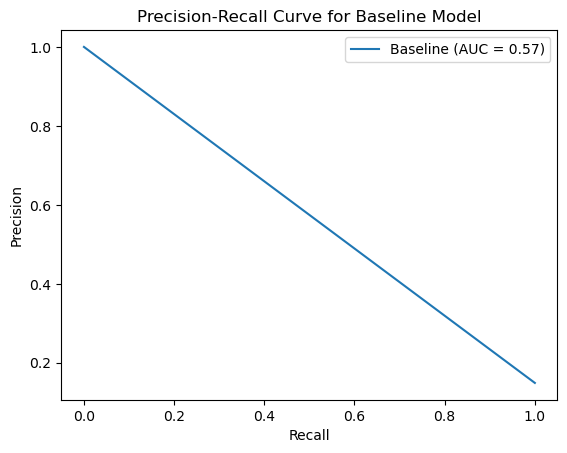

In [294]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

# Situation 1: Predict Everything as Class 0 (Majority Class)
print(f"Situation 1: Predict Everything as Class 0 (Majority Class)")
print(f"Precision: Undefined (No positive predictions)")
print(f"Recall: 0")

# Situation 2: Predict Everything as Class 1 (Minority Class)
# Count n0 and n1 in the training set
n0 = sum(y_train == 0)  # Number of class 0 samples
n1 = sum(y_train == 1)  # Number of class 1 samples

# Calculate Precision
precision_baseline = n1 / (n1 + n0)  # Precision when predicting all as 1
recall_baseline = 1  # Recall is perfect when predicting all as 1

# Output the result for Situation 2
print(f"\nSituation 2: Predict Everything as Class 1 (Minority Class)")
print(f"Precision: {precision_baseline:.4f}, Recall: {recall_baseline:.4f}")

# Precision-Recall Curve (Baseline)
y_pred_all_1 = np.ones(len(y_train))  # All predictions are 1
precision_curve_baseline, recall_curve_baseline, thresholds = precision_recall_curve(y_train, y_pred_all_1)
auc_pr_baseline = auc(recall_curve_baseline, precision_curve_baseline)

print(f"Baseline Precision-Recall AUC: {auc_pr_baseline:.4f}")

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall_curve_baseline, precision_curve_baseline, label=f"Baseline (AUC = {auc_pr_baseline:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Baseline Model")
plt.legend(loc="best")
plt.show()

## 1. Logistic Regression

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score, precision_recall_curve, auc, confusion_matrix, make_scorer
)
import numpy as np

# Random states to loop through
random_states = [0, 1, 2, 42, 100]

# Store results for logistic regression
results_logistic = []
best_result = None

# Loop through different random states
for random_state in random_states:
    print(f"Running Logistic Regression with random state: {random_state}")
    
    # Define StratifiedKFold with the current random state
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # Define Logistic Regression pipeline
    logistic_pipeline = Pipeline(steps=[
        ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=10000, random_state=42))
    ])

    # Define parameter grid for GridSearchCV
    param_grid_logistic = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'classifier__penalty': ['l1', 'l2'],  # Only L1 and L2
        'classifier__solver': ['liblinear']  # Supports L1 and L2
    }
    
    # Precision scorer for class 1
    scorer = make_scorer(precision_score, pos_label=1, greater_is_better=True, zero_division=0)
    
    # Perform GridSearchCV with current random state
    grid_search = GridSearchCV(
        logistic_pipeline,
        param_grid=param_grid_logistic,
        cv=stratified_kfold,
        scoring=scorer,
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train_transformed, y_train)
    
    # Get the best model and evaluate it
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test_transformed)
    y_prob = best_model.decision_function(X_test_transformed)  # Scores for PR curve

    # Calculate metrics for Class 1
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_curve, precision_curve)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results for this random state
    current_result = {
        'random_state': random_state,
        'best_params': best_params,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'pr_auc': pr_auc,
        'conf_matrix': conf_matrix
    }
    results_logistic.append(current_result)

    # Track the best result
    if best_result is None or current_result['precision'] > best_result['precision']:
        best_result = current_result

# Display the best result
print("\n--- Best Logistic Regression Model Results ---")
print(f"Random State: {best_result['random_state']}")
print(f"Best Parameters: {best_result['best_params']}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"PR AUC: {best_result['pr_auc']:.4f}")


Running Logistic Regression with random state: 0
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 1
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 2
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 42
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 100
Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Best Logistic Regression Model Results ---
Random State: 0
Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Precision: 0.1473
Recall: 1.0000
PR AUC: 0.3158


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, precision_recall_curve, auc
import numpy as np

# Random states to loop through
random_states = [0, 1, 2, 42, 100]

# Store results for logistic regression
results_logistic = []

# Loop through different random states
for random_state in random_states:
    print(f"Running Logistic Regression with random state: {random_state}")
    
    # Define StratifiedKFold with the current random state
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # Define Logistic Regression pipeline
    logistic_pipeline = Pipeline(steps=[
        ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=10000, random_state=42))
    ])

    param_grid_logistic = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Only L1 and L2
    'classifier__solver': ['liblinear']  # Supports L1 and L2
    }   
    
    # Perform GridSearchCV with current random state
    grid_search = GridSearchCV(
        logistic_pipeline,
        param_grid=param_grid_logistic,
        cv=stratified_kfold,
        scoring='precision',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train_transformed, y_train)
    
    # Get the best model and evaluate it
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    y_prob = best_model.decision_function(X_test_transformed)  # Scores for PR curve
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Store results for this random state
    results_logistic.append({
        'random_state': random_state,
        'best_params': grid_search.best_params_,
        'precision': precision,
        'pr_auc': pr_auc
    })

    

Running Logistic Regression with random state: 0
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 1
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 2
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 42
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Running Logistic Regression with random state: 100
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [282]:
# Calculate mean & variance across random states
precisions_lr = [result['precision'] for result in results_logistic]
pr_aucs_lr = [result['pr_auc'] for result in results_logistic]

precision_mean_lr = np.mean(precisions_lr)
precision_variance_lr = np.var(precisions_lr)
pr_auc_mean_lr = np.mean(pr_aucs_lr)
pr_auc_variance_lr = np.var(pr_aucs_lr)

# Find the best single model based on precision
best_logistic_model_result = max(results_logistic, key=lambda x: x['precision'])
best_single_precision_lr = best_logistic_model_result['precision']
best_single_params_lr = best_logistic_model_result['best_params']

# Print aggregated results
print("\n--- Aggregated Results Across Random States For Logistic Regression ---")
print(f"Precision Mean: {precision_mean_lr:.4f}")
print(f"Precision Variance: {precision_variance_lr:.4f}")
print(f"PR AUC Mean: {pr_auc_mean_lr:.4f}")
print(f"PR AUC Variance: {pr_auc_variance_lr:.4f}")

# Print best single model
print("\n--- Best Single Model for Logistic Regression ---")
print(f"Precision: {best_single_precision_lr:.4f}")
print(f"Parameters: {best_single_params_lr}")

# Store final results in a dictionary for comparison across models
final_results = {
    'Logistic Regression': {
        'mean_precision': precision_mean_lr,
        'variance_precision': precision_variance_lr,
        'mean_pr_auc': pr_auc_mean_lr,
        'variance_pr_auc': pr_auc_variance_lr,
        'best_single_precision': best_single_precision_lr,
        'best_single_params': best_single_params_lr
    }
}


--- Aggregated Results Across Random States For Logistic Regression ---
Precision Mean: 0.1458
Precision Variance: 0.0000
PR AUC Mean: 0.2994
PR AUC Variance: 0.0005

--- Best Single Model for Logistic Regression ---
Precision: 0.1473
Parameters: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


## 2. KNN

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, precision_recall_curve, auc, make_scorer
import numpy as np

# Random states to loop through
random_states = [0, 1, 2, 42, 100]

# Store results for KNN
results_knn = []

# Custom scorer to explicitly evaluate precision for Class 1
scorer = make_scorer(precision_score, pos_label=1, greater_is_better=True, zero_division=0)

# Loop through different random states
for random_state in random_states:
    print(f"Running KNN with random state: {random_state}")
    
    # Define StratifiedKFold with the current random state
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # Define KNN pipeline
    knn_pipeline = Pipeline(steps=[
        ('classifier', KNeighborsClassifier())
    ])

    # Define parameter grid for GridSearchCV
    param_grid_knn = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
        'classifier__weights': ['uniform', 'distance'],  # Weighting method
        'classifier__p': [1, 2]  # Distance metric: 1=Manhattan, 2=Euclidean
    }
    
    # Perform GridSearchCV with current random state
    grid_search = GridSearchCV(
        knn_pipeline,
        param_grid=param_grid_knn,
        cv=stratified_kfold,
        scoring=scorer,  # Use custom scorer for precision on Class 1
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train_transformed, y_train)
    
    # Get the best model and evaluate it
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    y_prob = best_model.predict_proba(X_test_transformed)[:, 1]  # Scores for PR curve
    
    # Check if there are any predictions for Class 1
    if sum(y_pred) == 0:
        print(f"No positive predictions (Class 1) for random state {random_state}.")
        precision = 0
        pr_auc = 0
    else:
        # Calculate metrics explicitly for Class 1
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob, pos_label=1)
        pr_auc = auc(recall_curve, precision_curve)
    
    # Store results for this random state
    results_knn.append({
        'random_state': random_state,
        'best_params': grid_search.best_params_,
        'precision': precision,
        'pr_auc': pr_auc
    })

# Print aggregated results
print("\n--- Results for KNN ---")
for result in results_knn:
    print(result)


Running KNN with random state: 0
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Running KNN with random state: 1
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running KNN with random state: 2
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running KNN with random state: 42
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Running KNN with random state: 100
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Results for KNN ---
{'random_state': 0, 'best_params': {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}, 'precision': 0.4, 'pr_auc': 0.21917695885481728}
{'random_state': 1, 'best_params': {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'distance'}, 'precision': 1.0, 'pr_auc': 0.247937515473988}
{'random_state': 2, 'best_params': {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}, 'precision': 0.4, 'pr_auc': 0.21917695885481728}
{'random_state': 42, 'best_params': {'classifier__n_neighbors': 7, 'classifier__p'

In [175]:
# Calculate mean & variance across random states
precisions_knn = [result['precision'] for result in results_knn]
pr_aucs_knn = [result['pr_auc'] for result in results_knn]

precision_mean_knn = np.mean(precisions_knn)
precision_variance_knn = np.var(precisions_knn)
pr_auc_mean_knn = np.mean(pr_aucs_knn)
pr_auc_variance_knn = np.var(pr_aucs_knn)

# Print aggregated results
print("\n--- Aggregated Results Across Random States for KNN ---")
print(f"Precision Mean: {precision_mean_knn:.4f}")
print(f"Precision Variance: {precision_variance_knn:.4f}")
print(f"PR AUC Mean: {pr_auc_mean_knn:.4f}")
print(f"PR AUC Variance: {pr_auc_variance_knn:.4f}")

# Find the best single model based on precision
best_knn_model_result = max(results_knn, key=lambda x: x['precision'])
best_single_precision_knn = best_knn_model_result['precision']
best_single_params_knn = best_knn_model_result['best_params']

print("\n--- Best Single Model for KNN ---")
print(f"Precision: {best_single_precision_knn:.4f}")
print(f"Parameters: {best_single_params_knn}")

# Store final results in a dictionary for comparison across models
final_results = {
    'KNN': {
        'mean_precision': precision_mean_knn,
        'variance_precision': precision_variance_knn,
        'mean_pr_auc': pr_auc_mean_knn,
        'variance_pr_auc': pr_auc_variance_knn,
        'best_single_precision': best_single_precision_knn,
        'best_single_params': best_single_params_knn
    }
}


--- Aggregated Results Across Random States for KNN ---
Precision Mean: 0.5400
Precision Variance: 0.0544
PR AUC Mean: 0.2263
PR AUC Variance: 0.0001

--- Best Single Model for KNN ---
Precision: 1.0000
Parameters: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'distance'}


## 3.Random Forest 

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, precision_recall_curve, auc, confusion_matrix
import numpy as np

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50,100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples for a split
}

# Random states to loop through
random_states = [0, 1, 2, 42, 100]

# Store results for all random states
results_rf = []

# Loop through random states
for random_state in random_states:
    print(f"Running with Random State: {random_state}")
    
    # Define StratifiedKFold with the current random state
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # Define Random Forest model
    rf_model = RandomForestClassifier(class_weight='balanced', random_state=random_state)
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(
        rf_model,
        param_grid=param_grid_rf,
        cv=stratified_kfold,
        scoring='precision',  # Focus on precision
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train_imputed, y_train)
    
    # Get the best model and evaluate it
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_imputed)
    y_prob = best_model.predict_proba(X_test_imputed)[:, 1]
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Calculate Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results_rf.append({
    'random_state': random_state,
    'best_model': best_model,  # Store best model
    'best_params': grid_search.best_params_,
    'precision': precision,
    'pr_auc': pr_auc,
    'conf_matrix': conf_matrix
})



Running with Random State: 0
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Running with Random State: 1
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Running with Random State: 2
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Running with Random State: 42
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Running with Random State: 100
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [176]:
# Calculate mean & variance across random states
precisions_rf = [result['precision'] for result in results_rf]
pr_aucs_rf = [result['pr_auc'] for result in results_rf]

precision_mean_rf = np.mean(precisions_rf)
precision_variance_rf = np.var(precisions_rf)
pr_auc_mean_rf = np.mean(pr_aucs_rf)
pr_auc_variance_rf = np.var(pr_aucs_rf)

# Find the best single model
best_rf_model_result = max(results_rf, key=lambda x: x['precision'])
best_single_precision_rf = best_rf_model_result['precision']
best_single_params_rf = best_rf_model_result['best_params']

# Print aggregated results
print("\n--- Aggregated Results Across Random States For Random Forest ---")
print(f"Precision Mean: {precision_mean_rf:.4f}")
print(f"Precision Variance: {precision_variance_rf:.4f}")
print(f"PR AUC Mean: {pr_auc_mean_rf:.4f}")
print(f"PR AUC Variance: {pr_auc_variance_rf:.4f}")

# Print best single model results
print("\n--- Best Single Model Results For Random Forest ---")
print(f"Precision: {best_single_precision_rf:.4f}")
print(f"Parameters: {best_single_params_rf}")

# Store final results in a dictionary for comparison across models
final_results = {
    'Random Forest': {
        'mean_precision': precision_mean_rf,
        'variance_precision': precision_variance_rf,
        'mean_pr_auc': pr_auc_mean_rf,
        'variance_pr_auc': pr_auc_variance_rf,
        'best_single_precision': best_single_precision_rf,
        'best_single_params': best_single_params_rf
    }
}


--- Aggregated Results Across Random States For Random Forest ---
Precision Mean: 0.6667
Precision Variance: 0.0093
PR AUC Mean: 0.5297
PR AUC Variance: 0.0002

--- Best Single Model Results For Random Forest ---
Precision: 0.8000
Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


## 4. XGBoost

In [295]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, precision_recall_curve, auc, confusion_matrix, make_scorer
)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import warnings
from xgboost import XGBClassifier

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Calculate class imbalance ratio for scale_pos_weight
num_negatives = np.sum(y_train == 0)
num_positives = np.sum(y_train == 1)
scale_pos_weight = num_negatives / num_positives

# Hyperparameter grid for XGBoost with scale_pos_weight included
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.66],
    'colsample_bytree': [0.6, 0.9],
    'scale_pos_weight': [scale_pos_weight],  # Add scale_pos_weight for imbalance handling
}

# Random states to evaluate
random_states = [0, 1, 2, 42, 100]
best_result = None  # To store the best result overall

# Results storage
results_xgb = []

# Loop through random states
for random_state in random_states:
    print(f"\nRandom State: {random_state}")
    
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    xgb_model = XGBClassifier(eval_metric='logloss', random_state=random_state)

    # Use precision for Class 1 as the scoring metric
    scorer = make_scorer(precision_score, pos_label=1, greater_is_better=True, zero_division=0)
    
    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid_xgb,
        scoring=scorer,
        cv=stratified_kfold,
        verbose=1,
        n_jobs=-1
    )
    
    # Fit the GridSearchCV
    grid_search.fit(X_train_original, y_train)
    
    # Evaluate the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_val_pred = best_model.predict(X_val)
    y_val_prob = best_model.predict_proba(X_val)[:, 1]  # Probability for Class 1

    # Metrics for Class 1
    precision = precision_score(y_val, y_val_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_val, y_val_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, pos_label=1, zero_division=0)

    # Precision-Recall Curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_val_prob, pos_label=1)
    pr_auc = auc(recall_curve, precision_curve)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    
    # Store results
    current_result = {
        'random_state': random_state,
        'best_params': best_params,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'pr_auc': pr_auc,
        'conf_matrix': conf_matrix
    }
    results_xgb.append(current_result)
    
    # Track the best result
    if best_result is None or current_result['precision'] > best_result['precision']:
        best_result = current_result

# Display best result
print("\n--- Best Model Results ---")
print(f"Random State: {best_result['random_state']}")
print(f"Best Parameters: {best_result['best_params']}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1 Score: {best_result['f1']:.4f}")
print(f"PR AUC: {best_result['pr_auc']:.4f}")


Random State: 0
Fitting 5 folds for each of 128 candidates, totalling 640 fits

Random State: 1
Fitting 5 folds for each of 128 candidates, totalling 640 fits

Random State: 2
Fitting 5 folds for each of 128 candidates, totalling 640 fits

Random State: 42
Fitting 5 folds for each of 128 candidates, totalling 640 fits

Random State: 100
Fitting 5 folds for each of 128 candidates, totalling 640 fits

--- Best Model Results ---
Random State: 2
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 5.711610486891386, 'subsample': 0.66}
Precision: 0.7619
Recall: 0.4706
F1 Score: 0.5818
PR AUC: 0.7071


In [296]:
# Calculate mean & variance across random states for XGBoost
precisions_xgb = [result['precision'] for result in results_xgb]
pr_aucs_xgb = [result['pr_auc'] for result in results_xgb]

precision_mean_xgb = np.mean(precisions_xgb)
precision_variance_xgb = np.var(precisions_xgb)
pr_auc_mean_xgb = np.mean(pr_aucs_xgb)
pr_auc_variance_xgb = np.var(pr_aucs_xgb)

# Find the best single model for XGBoost
best_xgb_model_result = max(results_xgb, key=lambda x: x['precision'])
best_single_precision_xgb = best_xgb_model_result['precision']
best_single_params_xgb = best_xgb_model_result['best_params']

# Print aggregated results
print("\n--- Aggregated Results Across Random States For XGBoost ---")
print(f"Precision Mean: {precision_mean_xgb:.4f}")
print(f"Precision Variance: {precision_variance_xgb:.4f}")
print(f"PR AUC Mean: {pr_auc_mean_xgb:.4f}")
print(f"PR AUC Variance: {pr_auc_variance_xgb:.4f}")

# Print best single model results
print("\n--- Best Single Model Results For XGBoost ---")
print(f"Precision: {best_single_precision_xgb:.4f}")
print(f"Parameters: {best_single_params_xgb}")

# Store final results in a dictionary for comparison across models
final_results['XGBoost'] = {
    'mean_precision': precision_mean_xgb,
    'variance_precision': precision_variance_xgb,
    'mean_pr_auc': pr_auc_mean_xgb,
    'variance_pr_auc': pr_auc_variance_xgb,
    'best_single_precision': best_single_precision_xgb,
    'best_single_params': best_single_params_xgb
}


--- Aggregated Results Across Random States For XGBoost ---
Precision Mean: 0.7134
Precision Variance: 0.0007
PR AUC Mean: 0.6929
PR AUC Variance: 0.0001

--- Best Single Model Results For XGBoost ---
Precision: 0.7619
Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 5.711610486891386, 'subsample': 0.66}


# 6. Evaluation Model Performance



## Comparison Model Performance

In [297]:
# Baseline mean precision (assuming it's the same as precision_baseline)
precision_baseline_mean = precision_baseline  # Use the previously calculated value
pr_auc_baseline_mean = auc_pr_baseline
precision_baseline_var = 0  # Variance is 0 as it's a single value
pr_auc_baseline_var = 0  # Similarly, variance in AUC is 0 for a fixed baseline


In [298]:
# Add Baseline results in the same format as other models
final_results['Baseline'] = {
    'mean_precision': precision_baseline_mean,
    'variance_precision': precision_baseline_var,
    'mean_pr_auc': pr_auc_baseline_mean,
    'variance_pr_auc': pr_auc_baseline_var,
    'best_single_precision': precision_baseline_mean,  # Single value for baseline
    'best_single_params': "N/A"  # Baseline has no parameters
}

# Store results in a dictionary for all models including baseline
final_results = {
    'Baseline': {
        'mean_precision': precision_baseline_mean,
        'variance_precision': precision_baseline_var,
        'mean_pr_auc': pr_auc_baseline_mean,
        'variance_pr_auc': pr_auc_baseline_var,
        'best_single_precision': precision_baseline_mean,
        'best_single_params': "N/A"
        },

    'Logistic Regression': {
        'mean_precision': precision_mean_lr,
        'variance_precision': precision_variance_lr,
        'mean_pr_auc': pr_auc_mean_lr,
        'variance_pr_auc': pr_auc_variance_lr,
        'best_single_precision': best_single_precision_lr,
        'best_single_params': best_single_params_lr,
    },

    'KNN': {
        'mean_precision': precision_mean_knn,
        'variance_precision': precision_variance_knn,
        'mean_pr_auc': pr_auc_mean_knn,
        'variance_pr_auc': pr_auc_variance_knn,
        'best_single_precision': best_single_precision_knn,
        'best_single_params': best_single_params_knn,
    },

    'Random Forest': {
        'mean_precision': precision_mean_rf,
        'variance_precision': precision_variance_rf,
        'mean_pr_auc': pr_auc_mean_rf,
        'variance_pr_auc': pr_auc_variance_rf,
        'best_single_precision': best_single_precision_rf,
        'best_single_params': best_single_params_rf,
    },
    'XGBoost': {
        'mean_precision': precision_mean_xgb,
        'variance_precision': precision_variance_xgb,
        'mean_pr_auc': pr_auc_mean_xgb,
        'variance_pr_auc': pr_auc_variance_xgb,
        'best_single_precision': best_single_precision_xgb,
        'best_single_params': best_single_params_xgb,
    },
}

In [299]:
import pandas as pd

# Convert final_results dictionary into a DataFrame for better formatting
comparison_df = pd.DataFrame.from_dict(final_results, orient='index')

# Reset the index to display model names as a column
comparison_df.reset_index(inplace=True)
comparison_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the table in a clean format
print("\n--- Summary of Metrics ---")
print(comparison_df)


--- Summary of Metrics ---
                 Model  mean_precision  variance_precision  mean_pr_auc  \
0             Baseline        0.148996            0.000000     0.574498   
1  Logistic Regression        0.145794            0.000005     0.299432   
2                  KNN        0.540000            0.054400     0.226261   
3        Random Forest        0.666667            0.009333     0.529665   
4              XGBoost        0.713381            0.000709     0.692864   

   variance_pr_auc  best_single_precision  \
0         0.000000               0.148996   
1         0.000502               0.147321   
2         0.000124               1.000000   
3         0.000186               0.800000   
4         0.000097               0.761905   

                                  best_single_params  
0                                                N/A  
1  {'classifier__C': 100, 'classifier__penalty': ...  
2  {'classifier__n_neighbors': 11, 'classifier__p...  
3  {'max_depth': None, 'min_sa

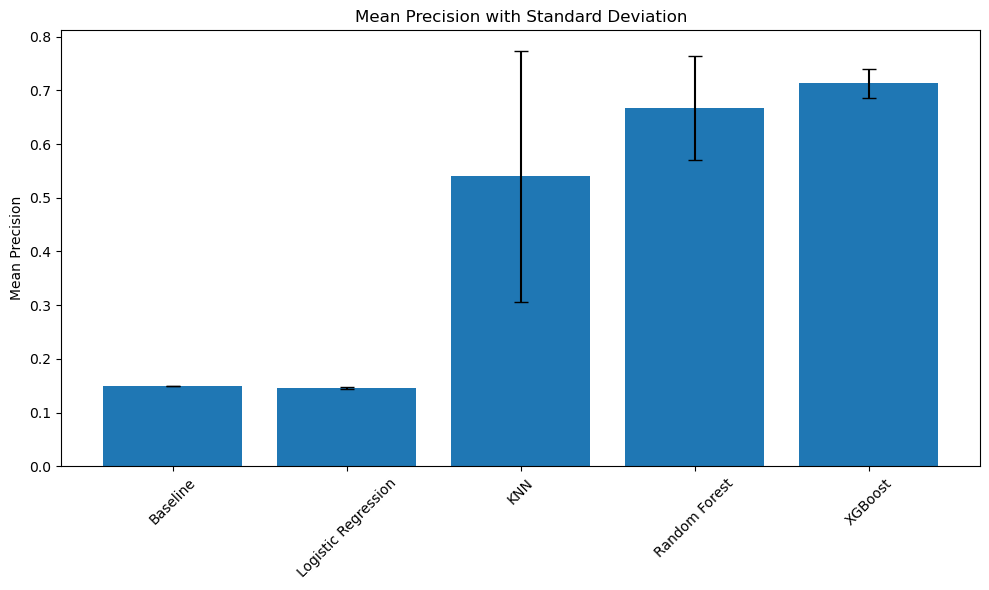

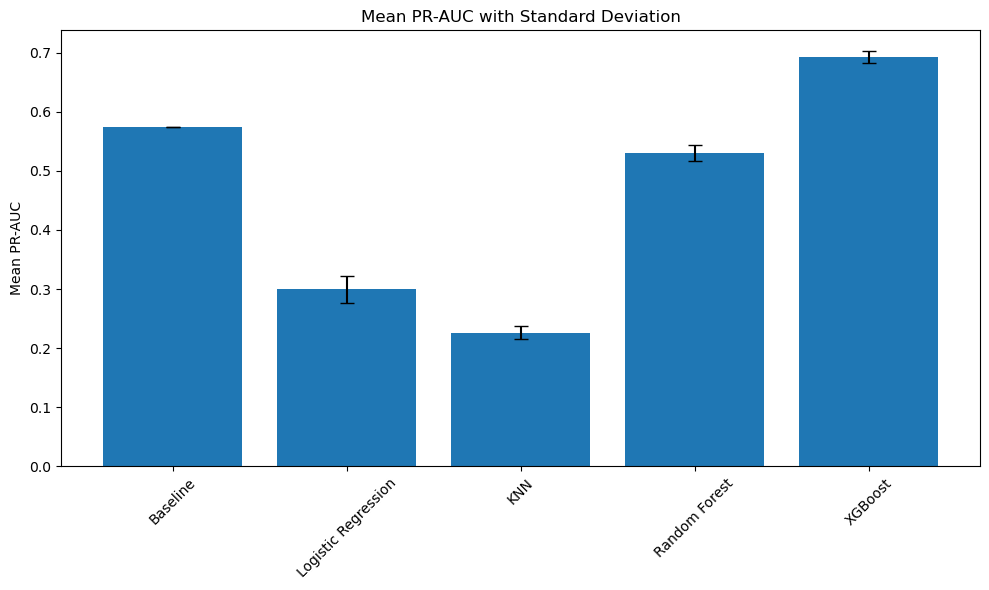

In [300]:
# Extract data for plotting
models = list(final_results.keys())
mean_precision = [final_results[model]['mean_precision'] for model in models]
std_precision = [np.sqrt(final_results[model]['variance_precision']) for model in models]
mean_pr_auc = [final_results[model]['mean_pr_auc'] for model in models]
std_pr_auc = [np.sqrt(final_results[model]['variance_pr_auc']) for model in models]

# Plot mean_precision with standard deviation
plt.figure(figsize=(10, 6))
plt.bar(models, mean_precision, yerr=std_precision, capsize=5)
plt.title('Mean Precision with Standard Deviation')
plt.ylabel('Mean Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot mean_pr_auc with standard deviation
plt.figure(figsize=(10, 6))
plt.bar(models, mean_pr_auc, yerr=std_pr_auc, capsize=5)
plt.title('Mean PR-AUC with Standard Deviation')
plt.ylabel('Mean PR-AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Evaluation and Visualization

## Reasoning for Choosing the Best Predictive Model: XGBoost

Confusion Matrix:
[[185   5]
 [ 18  16]]


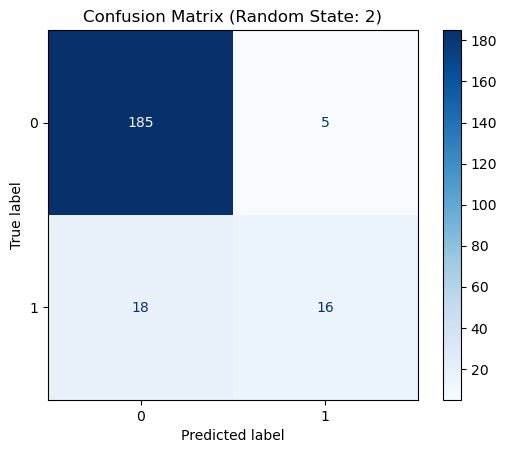

In [301]:
print("Confusion Matrix:")
print(best_result['conf_matrix'])

# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=best_result['conf_matrix'], display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Random State: {best_result['random_state']})")
plt.show()

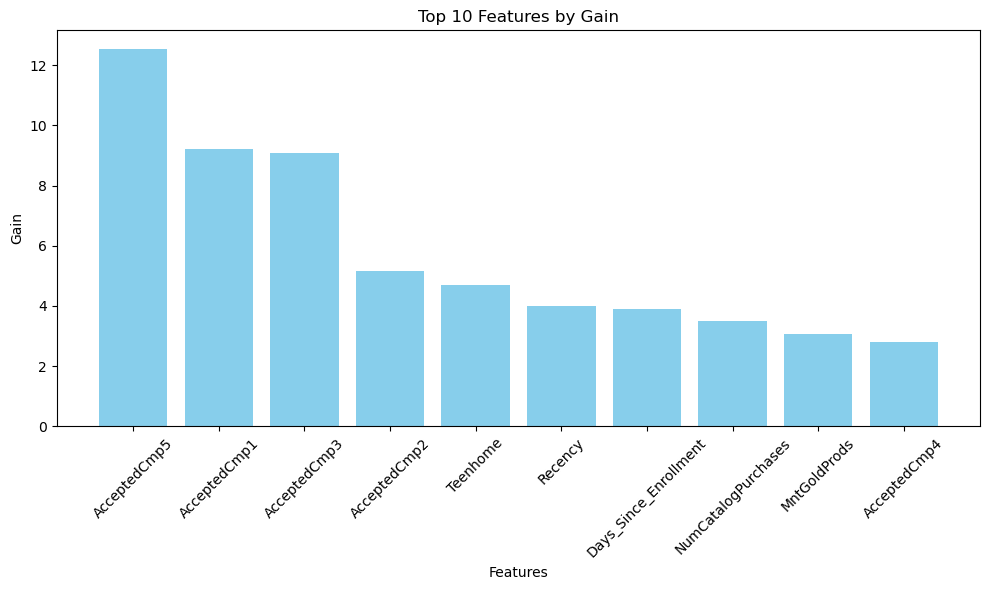

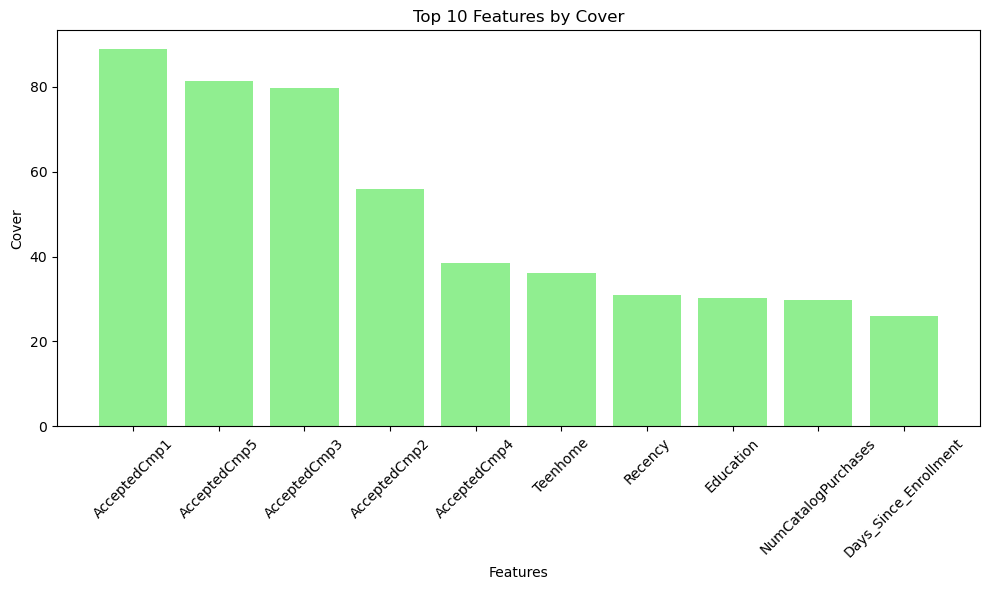

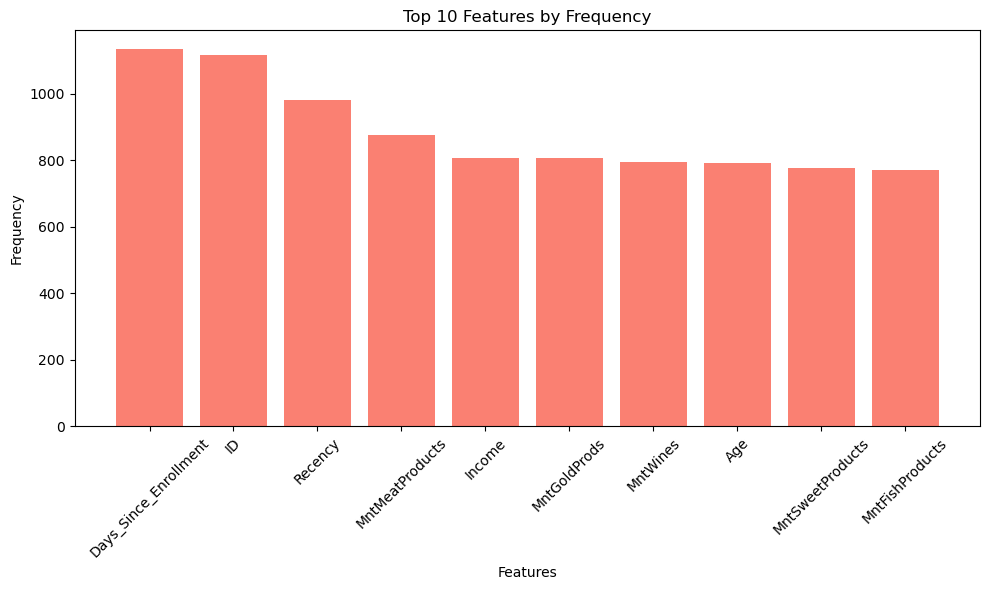

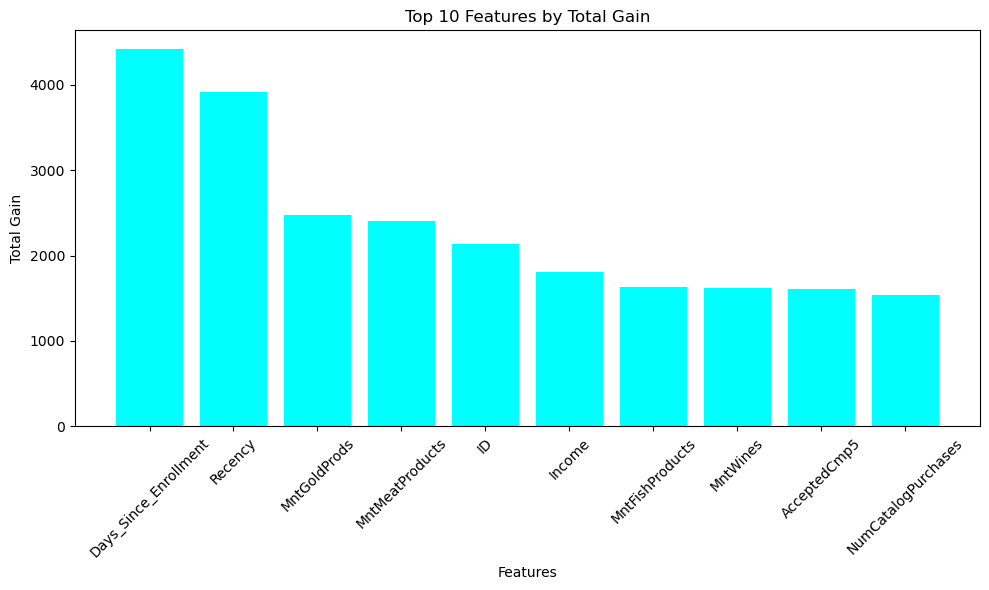

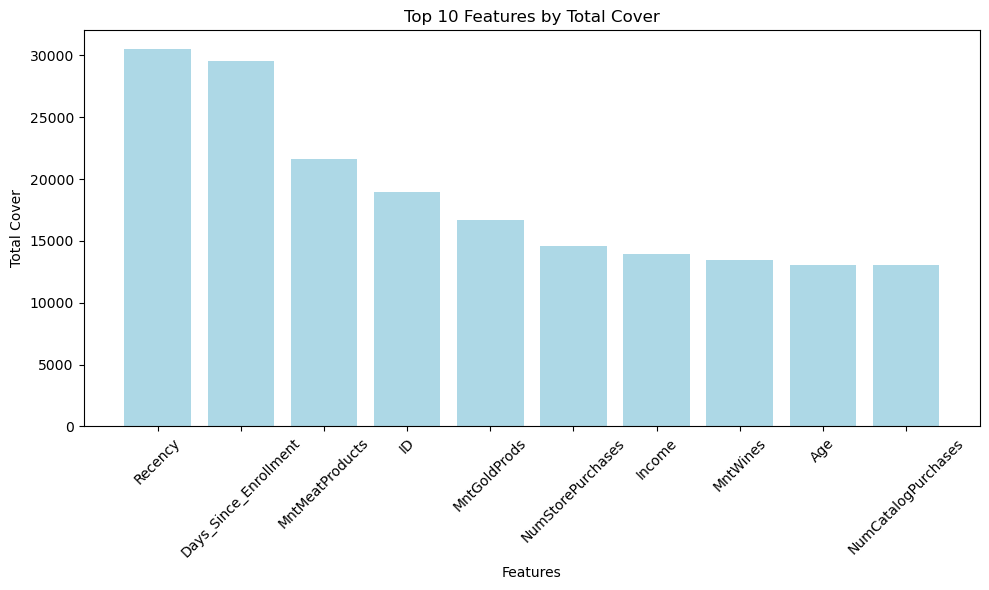

In [303]:
import matplotlib.pyplot as plt

# Calculate feature importance using different metrics
gain_importance = best_model.get_booster().get_score(importance_type='gain')
cover_importance = best_model.get_booster().get_score(importance_type='cover')
frequency_importance = best_model.get_booster().get_score(importance_type='weight')
total_gain = best_model.get_booster().get_score(importance_type='total_gain')
total_cover = best_model.get_booster().get_score(importance_type='total_cover')

# Convert importance to sorted lists
def sort_importance(importance_dict):
    return sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

gain_sorted = sort_importance(gain_importance)
cover_sorted = sort_importance(cover_importance)
frequency_sorted = sort_importance(frequency_importance)
total_gain_sorted = sort_importance(total_gain)
total_cover_sorted = sort_importance(total_cover)

# Prepare feature names and scores for top 10 features
def extract_top_features(importance_sorted, top_n=10):
    features, scores = zip(*importance_sorted[:top_n])  # Extract top N
    return features, scores

# Extract top 10 features for each metric
top_gain_features, top_gain_scores = extract_top_features(gain_sorted)
top_cover_features, top_cover_scores = extract_top_features(cover_sorted)
top_frequency_features, top_frequency_scores = extract_top_features(frequency_sorted)
top_total_gain_features, top_total_gain_scores = extract_top_features(total_gain_sorted)
top_total_cover_features, top_total_cover_scores = extract_top_features(total_cover_sorted)

# Helper function to plot feature importance
def plot_importance(features, scores, title, xlabel, ylabel, color):
    plt.figure(figsize=(10, 6))
    plt.bar(features, scores, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot feature importance by different metrics
plot_importance(top_gain_features, top_gain_scores, "Top 10 Features by Gain", "Features", "Gain", "skyblue")
plot_importance(top_cover_features, top_cover_scores, "Top 10 Features by Cover", "Features", "Cover", "lightgreen")
plot_importance(top_frequency_features, top_frequency_scores, "Top 10 Features by Frequency", "Features", "Frequency", "salmon")
plot_importance(top_total_gain_features, top_total_gain_scores, "Top 10 Features by Total Gain", "Features", "Total Gain", "cyan")
plot_importance(top_total_cover_features, top_total_cover_scores, "Top 10 Features by Total Cover", "Features", "Total Cover", "lightblue")


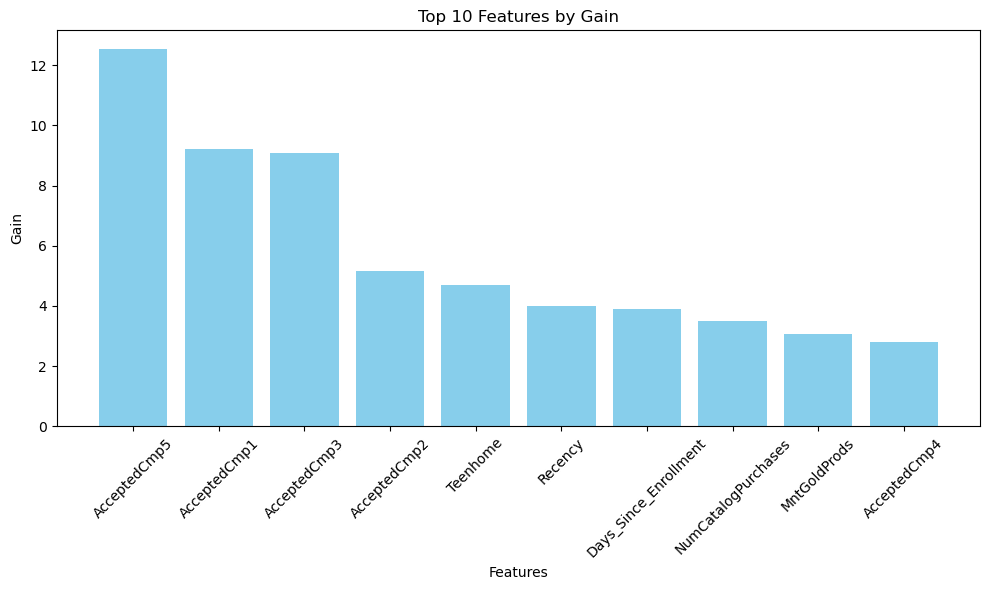

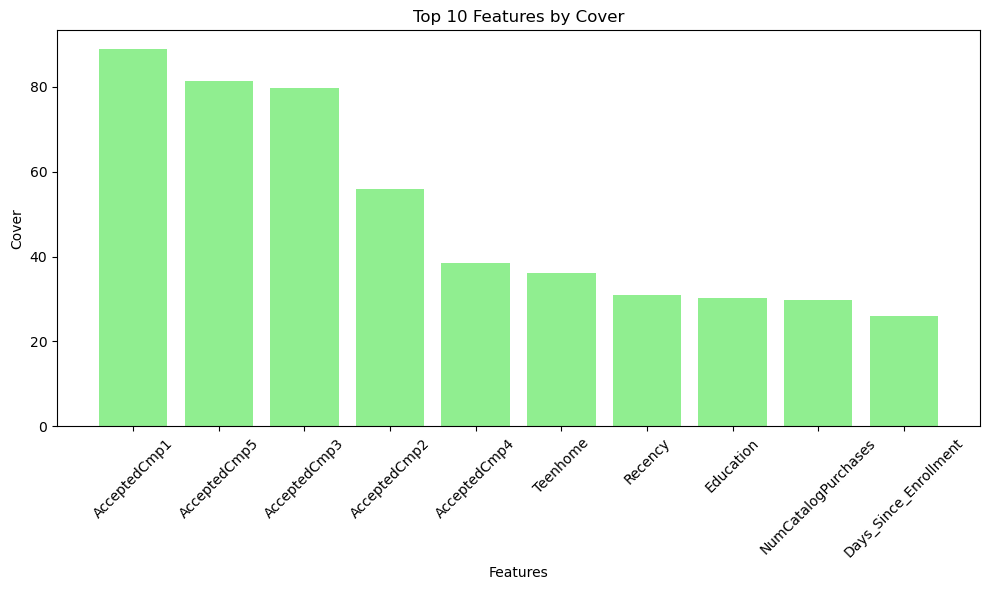

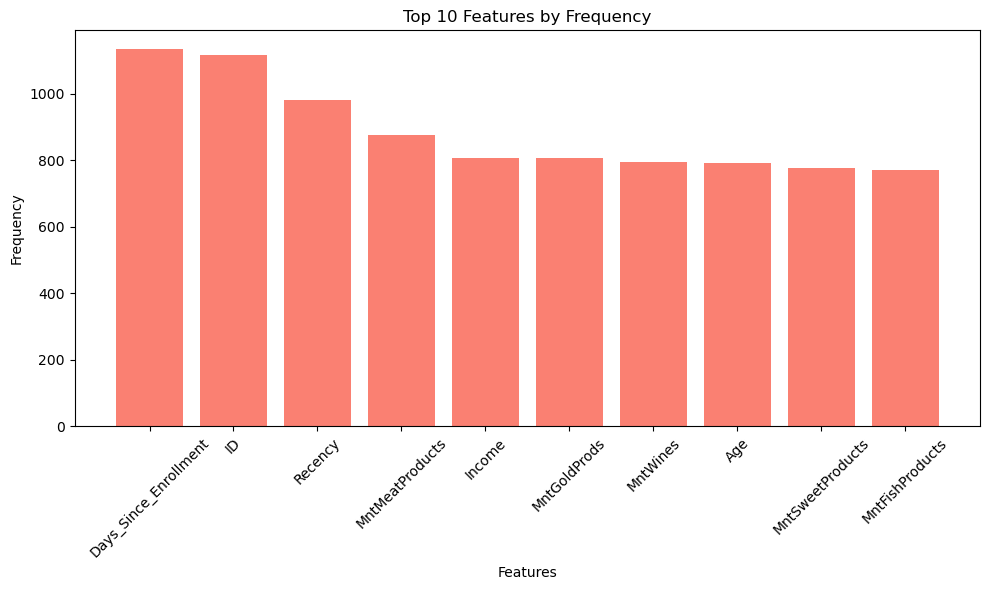

In [302]:
import matplotlib.pyplot as plt

# Calculate feature importance using different metrics
gain_importance = best_model.get_booster().get_score(importance_type='gain')
cover_importance = best_model.get_booster().get_score(importance_type='cover')
frequency_importance = best_model.get_booster().get_score(importance_type='weight')

# Convert importance to sorted lists
gain_sorted = sorted(gain_importance.items(), key=lambda x: x[1], reverse=True)
cover_sorted = sorted(cover_importance.items(), key=lambda x: x[1], reverse=True)
frequency_sorted = sorted(frequency_importance.items(), key=lambda x: x[1], reverse=True)

# Prepare feature names and scores for top 10 features
def extract_top_features(importance_sorted, top_n=10):
    features, scores = zip(*importance_sorted[:top_n])  # Extract top N
    return features, scores

# Extract top 10 features for each metric
top_gain_features, top_gain_scores = extract_top_features(gain_sorted)
top_cover_features, top_cover_scores = extract_top_features(cover_sorted)
top_frequency_features, top_frequency_scores = extract_top_features(frequency_sorted)

# Plot feature importance by Gain
plt.figure(figsize=(10, 6))
plt.bar(top_gain_features, top_gain_scores, color='skyblue')
plt.title("Top 10 Features by Gain")
plt.xlabel("Features")
plt.ylabel("Gain")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot feature importance by Cover
plt.figure(figsize=(10, 6))
plt.bar(top_cover_features, top_cover_scores, color='lightgreen')
plt.title("Top 10 Features by Cover")
plt.xlabel("Features")
plt.ylabel("Cover")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot feature importance by Frequency
plt.figure(figsize=(10, 6))
plt.bar(top_frequency_features, top_frequency_scores, color='salmon')
plt.title("Top 10 Features by Frequency")
plt.xlabel("Features")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

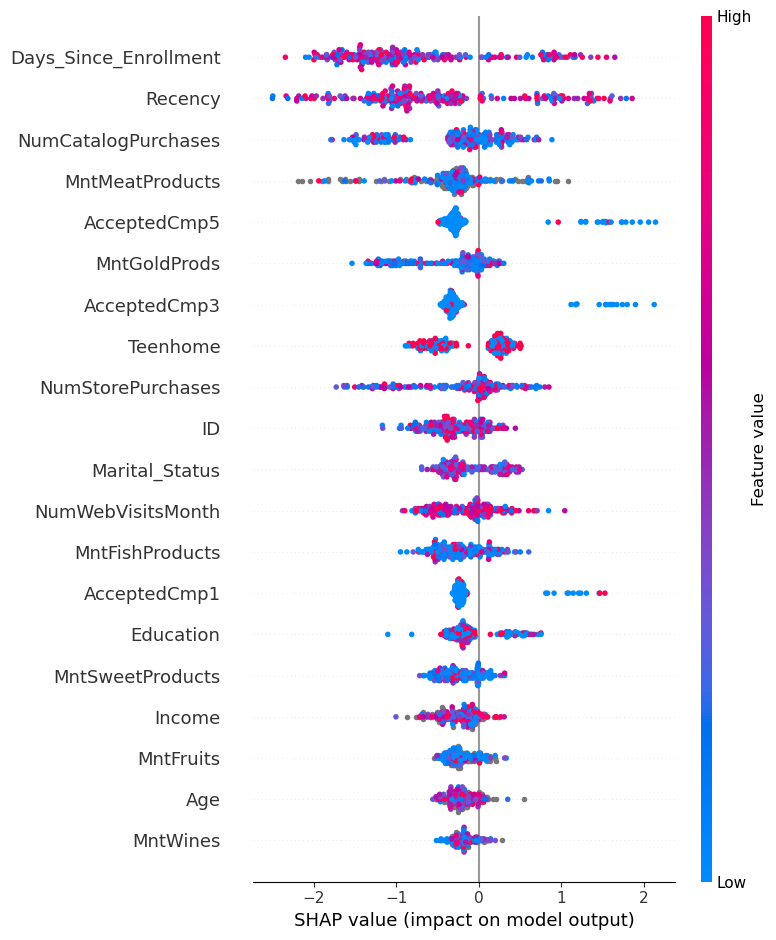

In [304]:
import shap

shap.initjs()
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_test)

In [305]:
# Generate SHAP values for validation set
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_val)

# Analyze a specific instance
index = 42  # Choose an instance to explain

# Force plot for Class 1
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][index, :],
    X_val.iloc[index, :],
    matplotlib=True, figsize=(15, 5)
)

# Bar plot for the same instance
shap.plots.bar(
    shap_values[1][index, :],  # SHAP values for the selected instance
    feature_names=X_val.columns.tolist()
)

IndexError: invalid index to scalar variable.

In [306]:
print(f"SHAP values shape: {np.shape(shap_values)}")

SHAP values shape: (224, 28)


In [307]:
print(f"Expected value shape: {np.shape(explainer.expected_value)}")

Expected value shape: ()


In [308]:
print(f"Number of rows in X_val: {X_val.shape[0]}")

Number of rows in X_val: 224


In [309]:
index = 42  # Replace with a valid index from X_val
shap.force_plot(
    explainer.expected_value[1],  # For Class 1
    shap_values[1][index, :],     # SHAP values for Class 1
    X_val.iloc[index, :],         # Feature values for the chosen instance
    matplotlib=True, figsize=(15, 5)
)


IndexError: invalid index to scalar variable.

In [310]:
print(f"SHAP values shape: {np.shape(shap_values)}")

SHAP values shape: (224, 28)


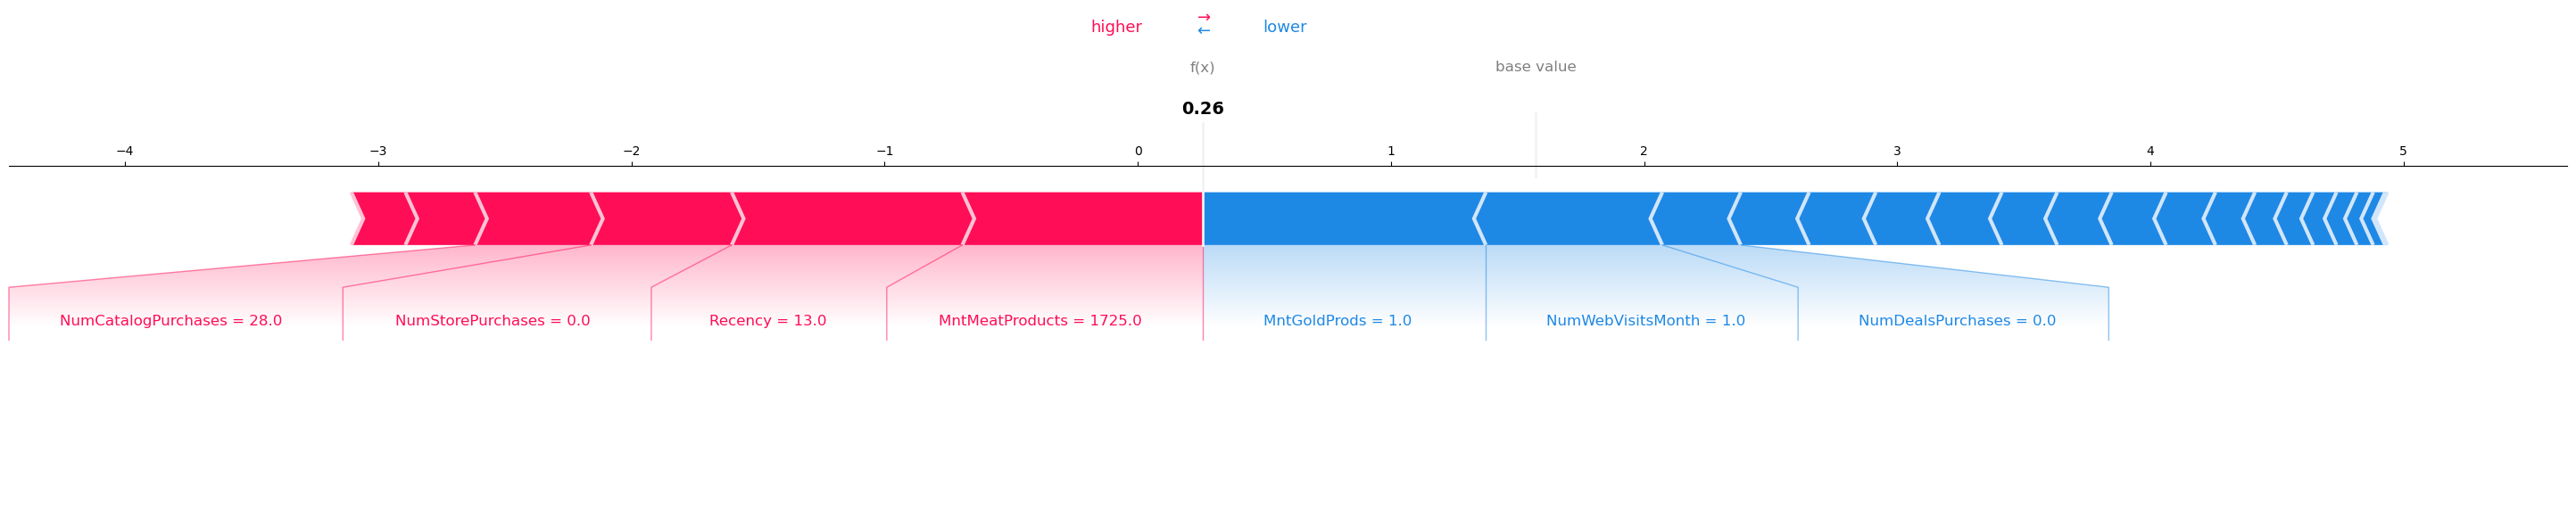

In [326]:
import shap

# Initialize SHAP and create an explainer
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

# Analyze a specific instance (e.g., index 1)
index = 1 # Replace with the index of the instance to explain

# Force plot for the chosen instance
shap.force_plot(
    explainer.expected_value,
    shap_values[index, :],
    X_val.iloc[index, :],
    matplotlib=True,
    figsize=(37, 5)
)